<a href="https://colab.research.google.com/github/ENRICOROBLESDELRIO/data_boot_camp_final_project/blob/cgzverduzco_branch/NeuronalNetwork%20Unbalanced%20and%20Balanced.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import data**

In [1]:
# Libraries and dependencies

import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import math
from sklearn.metrics import accuracy_score
from google.colab import files
from sqlalchemy import create_engine
import psycopg2

## Import for models
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.model_selection import train_test_split
import re
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from collections import Counter
import itertools

# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import tensorflow as tf
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

/usr/local/lib/python3.7/dist-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


In [2]:
# Google Cloud SQL connexion:
# Code taken from: https://stackoverflow.com/questions/53180140/how-to-access-cloud-sql-from-google-colab
!gcloud auth login
!gcloud config set project endeavor-intelligence-unit
!gcloud sql instances describe finalprojectdb


Go to the following link in your browser:

    https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=openid+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fcloud-platform+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fappengine.admin+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fcompute+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Faccounts.reauth&state=RKzKckd2pcvNLXnAMFveyFQ8TWN8YH&prompt=consent&access_type=offline&code_challenge=cxJvA775gkfpZon80Vs2R8BKZJHIFm3HUEaGAsg_Hz8&code_challenge_method=S256

Enter verification code: 4/1AX4XfWiDMVAkoxtQtU8AHoldN2YpVa3xq0DY47PcOkcyRBHlxwulPY9sBNw

You are now logged in as [c.gzverduzco@gmail.com].
Your current project is [None].  You can change this setting by running:
  $ gcloud config set project PROJECT_ID
Updated property [core/project].
ERROR: (gcloud.sql.instances.describe) There was no ins

In [3]:
# download and initialize the psql proxy
!wget https://dl.google.com/cloudsql/cloud_sql_proxy.linux.amd64 -O cloud_sql_proxy
!chmod +x cloud_sql_proxy

# "connectionName" is from the previous block
!nohup ./cloud_sql_proxy -instances="endeavor-intelligence-unit:northamerica-northeast2:finalprojectdb"=tcp:5432 &
!sleep 30s

--2021-11-21 16:25:19--  https://dl.google.com/cloudsql/cloud_sql_proxy.linux.amd64
Resolving dl.google.com (dl.google.com)... 172.217.203.91, 172.217.203.190, 172.217.203.93, ...
Connecting to dl.google.com (dl.google.com)|172.217.203.91|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16638816 (16M) [application/octet-stream]
Saving to: ‘cloud_sql_proxy’

cloud_sql_proxy     100%[===================>]  15.87M  --.-KB/s    in 0.08s   

2021-11-21 16:25:19 (210 MB/s) - ‘cloud_sql_proxy’ saved [16638816/16638816]

nohup: appending output to 'nohup.out'


In [4]:
#Checking the proxy´s logs 
!cat nohup.out

2021/11/21 16:25:19 current FDs rlimit set to 1048576, wanted limit is 8500. Nothing to do here.
2021/11/21 16:25:21 errors parsing config:
	googleapi: Error 403: The client is not authorized to make this request., notAuthorized


In [5]:
# Connexion throught psycopg2 Google Cloud SQL data base
conn = psycopg2.connect(
    host='34.130.143.207', port='5432', database="data_investments",
    user="postgres", password="zgHqczD17IDyeSQL")

#Rounds

In [ ]:
# Query to connect with SQL data base
SQL_Query = pd.read_sql_query('''select * FROM "Rounds" ''', conn)
rounds_df = pd.DataFrame(SQL_Query)

In [ ]:
# Data base of VC Rounds in entrepreneurs 
rounds_df.head(20)

,id_company,category,deal_type,foundation_year,number_employees,increase_employees,number_investors,current_status,foreign_vc,local_vc,round_year,round_amount,support_company,manufacture_equipment,develop_new_tech,grow_company,add_new_services,develop_business,financial_banking,develop_products_services,marketing_strategies,expand_internationality,consolidate_company,increase_team
0,3,E-Commerce,Seed,2017,33.0,8,3,1,0,1,2017,1400000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,7,SaaS,Seed,2018,10.0,0,2,0,0,1,2018,10500.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,10,SaaS,Angel,2015,11.0,14,1,1,0,1,2015,200000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,13,IT services,Seed,2016,10.0,0,1,0,0,1,2016,50000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,23,E-Commerce,Seed,2013,1001.0,0,1,1,1,0,2013,150000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,23,E-Commerce,Seed,2020,1001.0,0,3,1,1,0,2020,2500000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,23,E-Commerce,Seed,2020,1001.0,0,4,1,1,0,2020,150000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,23,E-Commerce,Series A,2020,1001.0,0,0,1,0,0,2020,12000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,23,E-Commerce,Series B,2021,1001.0,0,2,1,1,0,2021,40000000.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9,33,SaaS,Accelerator/Incubator,2013,6.0,0,1,1,1,0,2013,40000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# data types
rounds_df.dtypes

id_company                     int64
category                      object
deal_type                     object
foundation_year                int64
number_employees             float64
increase_employees             int64
number_investors               int64
current_status                 int64
foreign_vc                     int64
local_vc                       int64
round_year                     int64
round_amount                 float64
support_company              float64
manufacture_equipment        float64
develop_new_tech             float64
grow_company                 float64
add_new_services             float64
develop_business             float64
financial_banking            float64
develop_products_services    float64
marketing_strategies         float64
expand_internationality      float64
consolidate_company          float64
increase_team                float64
dtype: object

In [ ]:
rounds_df.isna().sum()

id_company                   0
category                     0
deal_type                    0
foundation_year              0
number_employees             7
increase_employees           0
number_investors             0
current_status               0
foreign_vc                   0
local_vc                     0
round_year                   0
round_amount                 0
support_company              5
manufacture_equipment        5
develop_new_tech             5
grow_company                 5
add_new_services             5
develop_business             5
financial_banking            5
develop_products_services    5
marketing_strategies         5
expand_internationality      5
consolidate_company          5
increase_team                5
dtype: int64

In [ ]:
rounds_df[rounds_df['current_status'].isnull()]


,id_company,category,deal_type,foundation_year,number_employees,increase_employees,number_investors,current_status,foreign_vc,local_vc,round_year,round_amount,support_company,manufacture_equipment,develop_new_tech,grow_company,add_new_services,develop_business,financial_banking,develop_products_services,marketing_strategies,expand_internationality,consolidate_company,increase_team


In [ ]:
rounds_df.count()

id_company                   1236
category                     1236
deal_type                    1236
foundation_year              1236
number_employees             1229
increase_employees           1236
number_investors             1236
current_status               1236
foreign_vc                   1236
local_vc                     1236
round_year                   1236
round_amount                 1236
support_company              1231
manufacture_equipment        1231
develop_new_tech             1231
grow_company                 1231
add_new_services             1231
develop_business             1231
financial_banking            1231
develop_products_services    1231
marketing_strategies         1231
expand_internationality      1231
consolidate_company          1231
increase_team                1231
dtype: int64

In [ ]:
len(rounds_df.axes[0])

1236

In [ ]:
# Drop the null columns where all values are null
rounds_df = rounds_df.dropna(axis='columns', how='all')
rounds_df.head()

,id_company,category,deal_type,foundation_year,number_employees,increase_employees,number_investors,current_status,foreign_vc,local_vc,round_year,round_amount,support_company,manufacture_equipment,develop_new_tech,grow_company,add_new_services,develop_business,financial_banking,develop_products_services,marketing_strategies,expand_internationality,consolidate_company,increase_team
0,3,E-Commerce,Seed,2017,33.0,8,3,1,0,1,2017,1400000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,7,SaaS,Seed,2018,10.0,0,2,0,0,1,2018,10500.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,10,SaaS,Angel,2015,11.0,14,1,1,0,1,2015,200000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,13,IT services,Seed,2016,10.0,0,1,0,0,1,2016,50000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,23,E-Commerce,Seed,2013,1001.0,0,1,1,1,0,2013,150000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Encoding labels
le = LabelEncoder()
db_rounds_Encode = rounds_df.copy()
db_rounds_Encode['deal_type'] = le.fit_transform(db_rounds_Encode['deal_type'])

# Get the name of the columns
columnsName = db_rounds_Encode.columns.tolist()
#columnsName.remove('rounds_funding_factor')

# convert variables to numerical
for column in columnsName:
  db_rounds_Encode[column] = pd.to_numeric(db_rounds_Encode[column], errors='coerce').fillna(0).astype(np.int64)

db_rounds_Encode.head()

,id_company,category,deal_type,foundation_year,number_employees,increase_employees,number_investors,current_status,foreign_vc,local_vc,round_year,round_amount,support_company,manufacture_equipment,develop_new_tech,grow_company,add_new_services,develop_business,financial_banking,develop_products_services,marketing_strategies,expand_internationality,consolidate_company,increase_team
0,3,0,10,2017,33,8,3,1,0,1,2017,1400000,0,0,0,0,0,0,0,0,0,0,0,0
1,7,0,10,2018,10,0,2,0,0,1,2018,10500,0,0,0,0,0,0,0,0,0,0,0,0
2,10,0,1,2015,11,14,1,1,0,1,2015,200000,0,0,0,0,0,0,0,0,0,0,0,0
3,13,0,10,2016,10,0,1,0,0,1,2016,50000,0,0,0,0,0,0,0,0,0,0,0,0
4,23,0,10,2013,1001,0,1,1,1,0,2013,150000,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# data types
db_rounds_Encode.dtypes

id_company                   int64
category                     int64
deal_type                    int64
foundation_year              int64
number_employees             int64
increase_employees           int64
number_investors             int64
current_status               int64
foreign_vc                   int64
local_vc                     int64
round_year                   int64
round_amount                 int64
support_company              int64
manufacture_equipment        int64
develop_new_tech             int64
grow_company                 int64
add_new_services             int64
develop_business             int64
financial_banking            int64
develop_products_services    int64
marketing_strategies         int64
expand_internationality      int64
consolidate_company          int64
increase_team                int64
dtype: object

In [ ]:
db_rounds_Encode.isna().sum()

id_company                   0
category                     0
deal_type                    0
foundation_year              0
number_employees             0
increase_employees           0
number_investors             0
current_status               0
foreign_vc                   0
local_vc                     0
round_year                   0
round_amount                 0
support_company              0
manufacture_equipment        0
develop_new_tech             0
grow_company                 0
add_new_services             0
develop_business             0
financial_banking            0
develop_products_services    0
marketing_strategies         0
expand_internationality      0
consolidate_company          0
increase_team                0
dtype: int64

In [ ]:
db_rounds_Encode.count()

id_company                   1236
category                     1236
deal_type                    1236
foundation_year              1236
number_employees             1236
increase_employees           1236
number_investors             1236
current_status               1236
foreign_vc                   1236
local_vc                     1236
round_year                   1236
round_amount                 1236
support_company              1236
manufacture_equipment        1236
develop_new_tech             1236
grow_company                 1236
add_new_services             1236
develop_business             1236
financial_banking            1236
develop_products_services    1236
marketing_strategies         1236
expand_internationality      1236
consolidate_company          1236
increase_team                1236
dtype: int64

#FOUNDERS

In [ ]:
# Query to connect with SQL data base from Founders Demographics 
SQL_Query = pd.read_sql_query('''select * FROM "Founders" ''', conn)
founders_df = pd.DataFrame(SQL_Query)

In [ ]:
# Data base of Founders Demographics  
founders_df.head(20)

,id_founder,id_company,general_location,manager_exp,clevel_exp,engineering_exp,sales_exp,finance_exp,human_capital_exp,consulting_exp,founder_exp,foundation_year,years_of_experience_as_entreprenuer,age_of_first_entrepreneurship,age,years_of_experience,number_of_startups,gender,foreing_studies,foreing_work_experience,foreing_founder
0,1,7,"Ciudad de México, México",1,1,0,0,0,0,0,1.0,2020.0,12.0,31.0,32.0,13.0,4,M,0,0,0
1,2,23,"Ciudad de México, México",0,1,0,0,0,0,0,1.0,2014.0,4.0,25.0,32.0,11.0,2,M,0,0,0
2,3,141,México,0,1,0,0,0,0,0,0.0,2015.0,0.0,22.0,28.0,6.0,1,M,0,1,0
3,4,152,"Ciudad de México, México",0,0,0,0,1,0,1,1.0,2017.0,6.0,28.0,32.0,10.0,3,M,1,1,1
4,5,155,México,1,1,0,0,0,0,0,0.0,2015.0,10.0,27.0,33.0,16.0,1,M,1,0,0
5,6,167,None,0,1,0,0,0,0,0,1.0,2003.0,0.0,NaN,41.0,18.0,1,M,0,0,0
6,7,185,"Ciudad de México, México",0,0,0,0,0,0,0,1.0,2021.0,20.0,41.0,41.0,20.0,4,M,1,0,0
7,8,233,"Ciudad de México, México",1,1,0,0,0,0,1,1.0,2016.0,13.0,34.0,39.0,18.0,2,F,0,1,1
8,9,1799,None,1,1,1,0,0,0,0,1.0,2013.0,25.0,54.0,62.0,33.0,1,M,0,1,0
9,10,284,"Ciudad de México, México",0,0,0,0,1,0,0,1.0,2016.0,2.0,24.0,29.0,7.0,1,M,0,0,0


In [ ]:
# data types
founders_df.dtypes

id_founder                               int64
id_company                               int64
general_location                        object
manager_exp                              int64
clevel_exp                               int64
engineering_exp                          int64
sales_exp                                int64
finance_exp                              int64
human_capital_exp                        int64
consulting_exp                           int64
founder_exp                            float64
foundation_year                        float64
years_of_experience_as_entreprenuer    float64
age_of_first_entrepreneurship          float64
age                                    float64
years_of_experience                    float64
number_of_startups                       int64
gender                                  object
foreing_studies                          int64
foreing_work_experience                  int64
foreing_founder                          int64
dtype: object

In [ ]:
founders_df.isna().sum()

id_founder                              0
id_company                              0
general_location                       11
manager_exp                             0
clevel_exp                              0
engineering_exp                         0
sales_exp                               0
finance_exp                             0
human_capital_exp                       0
consulting_exp                          0
founder_exp                             1
foundation_year                         7
years_of_experience_as_entreprenuer     7
age_of_first_entrepreneurship          74
age                                     6
years_of_experience                     6
number_of_startups                      0
gender                                  0
foreing_studies                         0
foreing_work_experience                 0
foreing_founder                         0
dtype: int64

In [ ]:
founders_df.count()


id_founder                             640
id_company                             640
general_location                       629
manager_exp                            640
clevel_exp                             640
engineering_exp                        640
sales_exp                              640
finance_exp                            640
human_capital_exp                      640
consulting_exp                         640
founder_exp                            639
foundation_year                        633
years_of_experience_as_entreprenuer    633
age_of_first_entrepreneurship          566
age                                    634
years_of_experience                    634
number_of_startups                     640
gender                                 640
foreing_studies                        640
foreing_work_experience                640
foreing_founder                        640
dtype: int64

In [ ]:
# Drop the null columns where all values are null
founders_df = founders_df.dropna(axis='columns', how='all')
founders_df.head()

,id_founder,id_company,general_location,manager_exp,clevel_exp,engineering_exp,sales_exp,finance_exp,human_capital_exp,consulting_exp,founder_exp,foundation_year,years_of_experience_as_entreprenuer,age_of_first_entrepreneurship,age,years_of_experience,number_of_startups,gender,foreing_studies,foreing_work_experience,foreing_founder
0,1,7,"Ciudad de México, México",1,1,0,0,0,0,0,1.0,2020.0,12.0,31.0,32.0,13.0,4,M,0,0,0
1,2,23,"Ciudad de México, México",0,1,0,0,0,0,0,1.0,2014.0,4.0,25.0,32.0,11.0,2,M,0,0,0
2,3,141,México,0,1,0,0,0,0,0,0.0,2015.0,0.0,22.0,28.0,6.0,1,M,0,1,0
3,4,152,"Ciudad de México, México",0,0,0,0,1,0,1,1.0,2017.0,6.0,28.0,32.0,10.0,3,M,1,1,1
4,5,155,México,1,1,0,0,0,0,0,0.0,2015.0,10.0,27.0,33.0,16.0,1,M,1,0,0


In [ ]:
# Encoding labels
le = LabelEncoder()
db_founders_Encode = founders_df.copy()
db_founders_Encode['general_location'] = db_founders_Encode['general_location'].fillna("nan", inplace = True) # Aqui Luis
db_founders_Encode['general_location'] = le.fit_transform(db_founders_Encode['general_location'])
db_founders_Encode['gender'] = le.fit_transform(db_founders_Encode['gender'])
#db_founders_Encode['category'] = le.fit_transform(db_founders_Encode['category'])

# Get the name of the columns
columnsName = db_founders_Encode.columns.tolist()

# convert variables to numerical
for column in columnsName:
  db_founders_Encode[column] = pd.to_numeric(db_founders_Encode[column], errors='coerce').fillna(0).astype(np.int64)

db_founders_Encode.head()

,id_founder,id_company,general_location,manager_exp,clevel_exp,engineering_exp,sales_exp,finance_exp,human_capital_exp,consulting_exp,founder_exp,foundation_year,years_of_experience_as_entreprenuer,age_of_first_entrepreneurship,age,years_of_experience,number_of_startups,gender,foreing_studies,foreing_work_experience,foreing_founder
0,1,7,0,1,1,0,0,0,0,0,1,2020,12,31,32,13,4,1,0,0,0
1,2,23,0,0,1,0,0,0,0,0,1,2014,4,25,32,11,2,1,0,0,0
2,3,141,0,0,1,0,0,0,0,0,0,2015,0,22,28,6,1,1,0,1,0
3,4,152,0,0,0,0,0,1,0,1,1,2017,6,28,32,10,3,1,1,1,1
4,5,155,0,1,1,0,0,0,0,0,0,2015,10,27,33,16,1,1,1,0,0


In [ ]:
# data types
db_founders_Encode.dtypes

id_founder                             int64
id_company                             int64
general_location                       int64
manager_exp                            int64
clevel_exp                             int64
engineering_exp                        int64
sales_exp                              int64
finance_exp                            int64
human_capital_exp                      int64
consulting_exp                         int64
founder_exp                            int64
foundation_year                        int64
years_of_experience_as_entreprenuer    int64
age_of_first_entrepreneurship          int64
age                                    int64
years_of_experience                    int64
number_of_startups                     int64
gender                                 int64
foreing_studies                        int64
foreing_work_experience                int64
foreing_founder                        int64
dtype: object

In [ ]:
db_founders_Encode.isna().sum()

id_founder                             0
id_company                             0
general_location                       0
manager_exp                            0
clevel_exp                             0
engineering_exp                        0
sales_exp                              0
finance_exp                            0
human_capital_exp                      0
consulting_exp                         0
founder_exp                            0
foundation_year                        0
years_of_experience_as_entreprenuer    0
age_of_first_entrepreneurship          0
age                                    0
years_of_experience                    0
number_of_startups                     0
gender                                 0
foreing_studies                        0
foreing_work_experience                0
foreing_founder                        0
dtype: int64

In [ ]:
db_founders_Encode.count()

id_founder                             640
id_company                             640
general_location                       640
manager_exp                            640
clevel_exp                             640
engineering_exp                        640
sales_exp                              640
finance_exp                            640
human_capital_exp                      640
consulting_exp                         640
founder_exp                            640
foundation_year                        640
years_of_experience_as_entreprenuer    640
age_of_first_entrepreneurship          640
age                                    640
years_of_experience                    640
number_of_startups                     640
gender                                 640
foreing_studies                        640
foreing_work_experience                640
foreing_founder                        640
dtype: int64

#Companies

In [290]:
# Query to connect with SQL data base
SQL_Query = pd.read_sql_query('''select * FROM "companies" ''', conn)
companies_df = pd.DataFrame(SQL_Query)

# Drop the null columns where all values are null
companies_df = companies_df.dropna(axis='columns', how='all')

# Encoding labels
le = LabelEncoder()
db_companies_Encode = companies_df.copy()

# Get the name of the columns
columnsName = db_companies_Encode.columns.tolist()
columnsName.remove('rounds_funding_factor')
r = re.compile("^mean")
columnsName = [column for column in columnsName if not r.match(column)]

# convert variables to numerical
for column in columnsName:
  db_companies_Encode[column] = pd.to_numeric(db_companies_Encode[column], errors='coerce').fillna(0).astype(np.int64)


In [291]:
db_companies_Encode.loc[db_companies_Encode['id_company'] == 2233.0]

,id_company,foundation_year,category,first_r_year,first_r_amount,last_funding_year,amount_last_funding,month_since_last_funding,number_employees,increase_employees,number_investors,current_status,rounds_funding_factor,soonicorn,more50_employees,more100_employees,dp_year,dp_rounds_count,dp_rounds_amount_sum,dp_rounds_amount_max,dp_last_round_year,dp_last_round_amount,dp_years_operating,max_manager_exp,max_clevel_exp,max_engineering_exp,max_sales_exp,max_finance_exp,max_human_capital_exp,max_consulting_exp,max_founder_exp,max_number_of_startups,max_gender,max_foreing_studies,max_foreing_work_experience,max_foreing_founder,max_dp_years_of_experience,max_dp_years_of_experience_as_entreprenuer,sum_manager_exp,sum_clevel_exp,sum_engineering_exp,sum_sales_exp,sum_finance_exp,sum_human_capital_exp,sum_consulting_exp,sum_founder_exp,sum_number_of_startups,sum_gender,sum_foreing_studies,sum_foreing_work_experience,sum_foreing_founder,sum_dp_years_of_experience,sum_dp_years_of_experience_as_entreprenuer,mean_manager_exp,mean_clevel_exp,mean_engineering_exp,mean_sales_exp,mean_finance_exp,mean_human_capital_exp,mean_consulting_exp,mean_founder_exp,mean_number_of_startups,mean_gender,mean_foreing_studies,mean_foreing_work_experience,mean_foreing_founder,mean_dp_years_of_experience,mean_dp_years_of_experience_as_entreprenuer
240,2233,2014,0,2014,500000000,2018,300000000,36,1596,81,1,1,0.0,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1,1,0,0,0,0,0,1,0,0,0,0,0,1,1,1,1,0,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0


# Models


In [292]:
# Copy the dataframe to new one, for create the models
db_companies_Encode_Model = db_companies_Encode.copy()
db_companies_Encode_Model

,id_company,foundation_year,category,first_r_year,first_r_amount,last_funding_year,amount_last_funding,month_since_last_funding,number_employees,increase_employees,number_investors,current_status,rounds_funding_factor,soonicorn,more50_employees,more100_employees,dp_year,dp_rounds_count,dp_rounds_amount_sum,dp_rounds_amount_max,dp_last_round_year,dp_last_round_amount,dp_years_operating,max_manager_exp,max_clevel_exp,max_engineering_exp,max_sales_exp,max_finance_exp,max_human_capital_exp,max_consulting_exp,max_founder_exp,max_number_of_startups,max_gender,max_foreing_studies,max_foreing_work_experience,max_foreing_founder,max_dp_years_of_experience,max_dp_years_of_experience_as_entreprenuer,sum_manager_exp,sum_clevel_exp,sum_engineering_exp,sum_sales_exp,sum_finance_exp,sum_human_capital_exp,sum_consulting_exp,sum_founder_exp,sum_number_of_startups,sum_gender,sum_foreing_studies,sum_foreing_work_experience,sum_foreing_founder,sum_dp_years_of_experience,sum_dp_years_of_experience_as_entreprenuer,mean_manager_exp,mean_clevel_exp,mean_engineering_exp,mean_sales_exp,mean_finance_exp,mean_human_capital_exp,mean_consulting_exp,mean_founder_exp,mean_number_of_startups,mean_gender,mean_foreing_studies,mean_foreing_work_experience,mean_foreing_founder,mean_dp_years_of_experience,mean_dp_years_of_experience_as_entreprenuer
0,3,2017,0,2017,1400000,2017,1400000,48,33,8,3,1,4.0,0,0,0,2017,1,1400000,1400000,2017,1400000,0,1,1,0,0,0,0,0,1,3,1,1,0,0,12,8,1,1,0,0,0,0,0,2,4,2,1,0,0,22,15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,0.0,0.0,0.0,11.0,7.0
1,7,2018,0,2018,10500,2018,10500,36,10,0,2,0,3.0,0,0,0,2018,1,10500,10500,2018,10500,0,1,1,0,0,0,0,0,1,4,1,0,0,0,10,9,1,1,0,0,0,0,0,1,4,1,0,0,0,10,9,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,1.0,0.0,0.0,0.0,10.0,9.0
2,10,2015,0,2015,200000,2015,200000,72,11,14,1,1,6.0,0,0,0,2015,1,200000,200000,2015,200000,0,1,1,0,0,0,0,0,1,1,1,0,0,0,12,2,1,1,0,0,0,0,0,1,1,1,0,0,0,12,2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,12.0,2.0
3,23,2013,0,2013,150000,2021,40000000,0,1001,0,0,1,0.0,1,1,1,2021,5,54800000,40000000,2021,40000000,8,0,1,0,0,0,0,0,1,2,1,0,0,0,11,4,0,1,0,0,0,0,0,1,2,1,0,0,0,11,4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,0.0,0.0,0.0,11.0,4.0
4,51,2018,0,2018,20000,2018,20000,36,10,0,1,0,3.0,0,0,0,2018,1,20000,20000,2018,20000,0,0,1,1,0,0,0,0,0,1,1,1,0,0,5,0,0,1,1,0,0,0,0,0,1,1,1,0,0,5,0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,5.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505,4429,2018,0,2018,750000,2021,3100000,0,259,249,0,1,0.0,0,1,1,2021,4,12510000,4960000,2021,3100000,3,1,1,0,1,0,0,1,1,1,1,1,1,0,12,11,1,1,0,1,0,0,1,1,1,1,1,1,0,12,11,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,12.0,11.0
506,4433,2021,0,2021,225000000,2021,225000000,0,125,124,2,1,0.0,1,1,1,2021,1,225000000,225000000,2021,225000000,0,0,1,0,0,1,0,1,1,1,1,1,0,1,9,8,0,1,0,0,1,0,1,1,1,1,1,0,1,9,8,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,9.0,8.0
507,4434,2021,0,2021,130000,2021,130000,0,11,0,1,1,0.0,0,0,0,2021,1,130000,130000,2021,130000,0,0,0,1,0,0,0,0,1,2,1,1,0,0,6,4,0,0,1,0,0,0,0,1,2,1,1,0,0,6,4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,1.0,0.0,0.0,6.0,4.0
508,4435,2021,0,2021,130000,2021,130000,0,9,0,1,1,0.0,0,0,0,2021,1,130000,130000,2021,130000,0,0,0,0,0,0,0,0,1,2,1,1,0,0,3,3,0,0,0,0,0,0,0,1,2,1,1,0,0,3,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,1.0,0.0,0.0,3.0,3.0


In [293]:
# Create de list for drop columns from Models
columnsName = db_companies_Encode_Model.columns.tolist()
r = re.compile("^mean|^max")
columnsName = [column for column in columnsName if r.match(column)]
columnsName.extend(["last_funding_year","amount_last_funding","month_since_last_funding","number_employees","increase_employees","number_investors"])

for column in columnsName:
  db_companies_Encode_Model = db_companies_Encode_Model.drop(column, axis='columns', inplace=False)
  
db_companies_Encode_Model

,id_company,foundation_year,category,first_r_year,first_r_amount,current_status,rounds_funding_factor,soonicorn,more50_employees,more100_employees,dp_year,dp_rounds_count,dp_rounds_amount_sum,dp_rounds_amount_max,dp_last_round_year,dp_last_round_amount,dp_years_operating,sum_manager_exp,sum_clevel_exp,sum_engineering_exp,sum_sales_exp,sum_finance_exp,sum_human_capital_exp,sum_consulting_exp,sum_founder_exp,sum_number_of_startups,sum_gender,sum_foreing_studies,sum_foreing_work_experience,sum_foreing_founder,sum_dp_years_of_experience,sum_dp_years_of_experience_as_entreprenuer
0,3,2017,0,2017,1400000,1,4.0,0,0,0,2017,1,1400000,1400000,2017,1400000,0,1,1,0,0,0,0,0,2,4,2,1,0,0,22,15
1,7,2018,0,2018,10500,0,3.0,0,0,0,2018,1,10500,10500,2018,10500,0,1,1,0,0,0,0,0,1,4,1,0,0,0,10,9
2,10,2015,0,2015,200000,1,6.0,0,0,0,2015,1,200000,200000,2015,200000,0,1,1,0,0,0,0,0,1,1,1,0,0,0,12,2
3,23,2013,0,2013,150000,1,0.0,1,1,1,2021,5,54800000,40000000,2021,40000000,8,0,1,0,0,0,0,0,1,2,1,0,0,0,11,4
4,51,2018,0,2018,20000,0,3.0,0,0,0,2018,1,20000,20000,2018,20000,0,0,1,1,0,0,0,0,0,1,1,1,0,0,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505,4429,2018,0,2018,750000,1,0.0,0,1,1,2021,4,12510000,4960000,2021,3100000,3,1,1,0,1,0,0,1,1,1,1,1,1,0,12,11
506,4433,2021,0,2021,225000000,1,0.0,1,1,1,2021,1,225000000,225000000,2021,225000000,0,0,1,0,0,1,0,1,1,1,1,1,0,1,9,8
507,4434,2021,0,2021,130000,1,0.0,0,0,0,2021,1,130000,130000,2021,130000,0,0,0,1,0,0,0,0,1,2,1,1,0,0,6,4
508,4435,2021,0,2021,130000,1,0.0,0,0,0,2021,1,130000,130000,2021,130000,0,0,0,0,0,0,0,0,1,2,1,1,0,0,3,3


In [294]:
db_companies_Encode_Model.dtypes

id_company                                      int64
foundation_year                                 int64
category                                        int64
first_r_year                                    int64
first_r_amount                                  int64
current_status                                  int64
rounds_funding_factor                         float64
soonicorn                                       int64
more50_employees                                int64
more100_employees                               int64
dp_year                                         int64
dp_rounds_count                                 int64
dp_rounds_amount_sum                            int64
dp_rounds_amount_max                            int64
dp_last_round_year                              int64
dp_last_round_amount                            int64
dp_years_operating                              int64
sum_manager_exp                                 int64
sum_clevel_exp              

In [295]:
# Generate our categorical variable lists
db_companies_cat = ["foundation_year","category","first_r_year","dp_year","current_status","dp_last_round_year"] 
db_companies_cat

['foundation_year',
 'category',
 'first_r_year',
 'dp_year',
 'current_status',
 'dp_last_round_year']

In [296]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(db_companies_Encode_Model[db_companies_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names_out(db_companies_cat)

# Merge one-hot encoded features and drop the originals
db_companies_Encode_Model = db_companies_Encode_Model.merge(encode_df,left_index=True, right_index=True)
db_companies_Encode_Model = db_companies_Encode_Model.drop(db_companies_cat,1)

# Create de list for drop columns from Models
columnsName = db_companies_Encode_Model.columns.tolist()
columnsName.remove('rounds_funding_factor')

# convert variables to numerical
for column in columnsName:
  db_companies_Encode_Model[column] = pd.to_numeric(db_companies_Encode_Model[column], errors='coerce').fillna(0).astype(np.int64)

In [297]:
db_companies_Encode_Model.dtypes

id_company                   int64
first_r_amount               int64
rounds_funding_factor      float64
soonicorn                    int64
more50_employees             int64
                            ...   
dp_last_round_year_2017      int64
dp_last_round_year_2018      int64
dp_last_round_year_2019      int64
dp_last_round_year_2020      int64
dp_last_round_year_2021      int64
Length: 91, dtype: object

In [298]:
db_companies_Encode_Model.loc[db_companies_Encode_Model['id_company'] == 2233]

,id_company,first_r_amount,rounds_funding_factor,soonicorn,more50_employees,more100_employees,dp_rounds_count,dp_rounds_amount_sum,dp_rounds_amount_max,dp_last_round_amount,dp_years_operating,sum_manager_exp,sum_clevel_exp,sum_engineering_exp,sum_sales_exp,sum_finance_exp,sum_human_capital_exp,sum_consulting_exp,sum_founder_exp,sum_number_of_startups,sum_gender,sum_foreing_studies,sum_foreing_work_experience,sum_foreing_founder,sum_dp_years_of_experience,sum_dp_years_of_experience_as_entreprenuer,foundation_year_2000,foundation_year_2004,foundation_year_2006,foundation_year_2008,foundation_year_2009,foundation_year_2010,foundation_year_2011,foundation_year_2012,foundation_year_2013,foundation_year_2014,foundation_year_2015,foundation_year_2016,foundation_year_2017,foundation_year_2018,...,first_r_year_2012,first_r_year_2013,first_r_year_2014,first_r_year_2015,first_r_year_2016,first_r_year_2017,first_r_year_2018,first_r_year_2019,first_r_year_2020,first_r_year_2021,dp_year_0,dp_year_2000,dp_year_2008,dp_year_2011,dp_year_2012,dp_year_2013,dp_year_2014,dp_year_2015,dp_year_2016,dp_year_2017,dp_year_2018,dp_year_2019,dp_year_2020,dp_year_2021,current_status_0,current_status_1,dp_last_round_year_0,dp_last_round_year_2000,dp_last_round_year_2008,dp_last_round_year_2011,dp_last_round_year_2012,dp_last_round_year_2013,dp_last_round_year_2014,dp_last_round_year_2015,dp_last_round_year_2016,dp_last_round_year_2017,dp_last_round_year_2018,dp_last_round_year_2019,dp_last_round_year_2020,dp_last_round_year_2021
240,2233,500000000,0.0,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [299]:
#companies_df.drop(companies_df[companies_df['id_company'] == 2233 ].index, inplace=True)

In [300]:
db_companies_Encode_Model.drop("id_company",axis='columns', inplace=True)
db_companies_Encode_Model.head()

,first_r_amount,rounds_funding_factor,soonicorn,more50_employees,more100_employees,dp_rounds_count,dp_rounds_amount_sum,dp_rounds_amount_max,dp_last_round_amount,dp_years_operating,sum_manager_exp,sum_clevel_exp,sum_engineering_exp,sum_sales_exp,sum_finance_exp,sum_human_capital_exp,sum_consulting_exp,sum_founder_exp,sum_number_of_startups,sum_gender,sum_foreing_studies,sum_foreing_work_experience,sum_foreing_founder,sum_dp_years_of_experience,sum_dp_years_of_experience_as_entreprenuer,foundation_year_2000,foundation_year_2004,foundation_year_2006,foundation_year_2008,foundation_year_2009,foundation_year_2010,foundation_year_2011,foundation_year_2012,foundation_year_2013,foundation_year_2014,foundation_year_2015,foundation_year_2016,foundation_year_2017,foundation_year_2018,foundation_year_2019,...,first_r_year_2012,first_r_year_2013,first_r_year_2014,first_r_year_2015,first_r_year_2016,first_r_year_2017,first_r_year_2018,first_r_year_2019,first_r_year_2020,first_r_year_2021,dp_year_0,dp_year_2000,dp_year_2008,dp_year_2011,dp_year_2012,dp_year_2013,dp_year_2014,dp_year_2015,dp_year_2016,dp_year_2017,dp_year_2018,dp_year_2019,dp_year_2020,dp_year_2021,current_status_0,current_status_1,dp_last_round_year_0,dp_last_round_year_2000,dp_last_round_year_2008,dp_last_round_year_2011,dp_last_round_year_2012,dp_last_round_year_2013,dp_last_round_year_2014,dp_last_round_year_2015,dp_last_round_year_2016,dp_last_round_year_2017,dp_last_round_year_2018,dp_last_round_year_2019,dp_last_round_year_2020,dp_last_round_year_2021
0,1400000,4.0,0,0,0,1,1400000,1400000,1400000,0,1,1,0,0,0,0,0,2,4,2,1,0,0,22,15,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,10500,3.0,0,0,0,1,10500,10500,10500,0,1,1,0,0,0,0,0,1,4,1,0,0,0,10,9,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,200000,6.0,0,0,0,1,200000,200000,200000,0,1,1,0,0,0,0,0,1,1,1,0,0,0,12,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,150000,0.0,1,1,1,5,54800000,40000000,40000000,8,0,1,0,0,0,0,0,1,2,1,0,0,0,11,4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,20000,3.0,0,0,0,1,20000,20000,20000,0,0,1,1,0,0,0,0,0,1,1,1,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [301]:
# Code for confusion matrix plot
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


# Code for model report
def report(X, y, y_name, model, X_train, y_train, X_valid, y_valid, X_test, y_test, model_loss, accuracy, precision, recall, f1, kappa, auc, balanced=None, y_resampled=None):
    print()
    print('-----------')
    if(balanced == True):
      print('Balanced')
      print(f'X: {len(X)}')
      print(f'y: {y_name}')
      print(f'y: {Counter(y)}')
      # Counter
      print('-----------')
      print('y_train')
      print(f'Unbalance: {Counter(y_train)}')
      print('-----------')
      print(f'Balance: {Counter(y_resampled)}')
    else:
      # Counter 
      print('Unbalanced')
      print(f'X: {len(X)}')
      print(f'y: {y_name}')
      print(f'y: {Counter(y)}')
    print('-----------')
    print('Train shape')
    print(f'X: {X_train.shape}'), print(f'y : {y_train.shape}')
    print('Valid shape')
    print(f'X: {X_valid.shape}'), print(f'y : {y_valid.shape}')
    print('Test shape')
    print(f'X: {X_test.shape}'), print(f'y : {y_test.shape}')
    print()
    print('-----------')
    print()
    # Check the structure of the model
    nn.summary()
    print()
    print(f'Loss: {model_loss}')
    print('Accuracy: %f' % accuracy)
    print('Precision: %f' % precision)
    print('Recall: %f' % recall)
    print('F1 score: %f' % f1)
    print('Cohens kappa: %f' % kappa)
    print('ROC AUC: %f' % auc)

# Unbalanced models

## Model 50 employees

In [302]:
# Copy the dataframe to new one, for create the models
df_Model =  db_companies_Encode_Model.copy()

# Split our preprocessed data into our features and target arrays
y_name = "more50_employees"
y = df_Model["more50_employees"].values
X = df_Model.drop(["more50_employees","more100_employees","soonicorn"],1).values

# Split the preprocessed data into a training and testing dataset. Config split (70-15-15)
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78, test_size=0.30))
X_train, X_rem, y_train, y_rem = train_test_split(X,y, train_size=0.7)
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5)

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0]) # 65features
hidden_nodes_layer1 =  200 #Rule 3(lenfeatures)
hidden_nodes_layer2 = 130

# Create the model
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
#nn.summary()

# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

#Early Stopping
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(
        monitor='accuracy', 
        patience=5,
        mode='max'
        ),
    tf.keras.callbacks.TensorBoard(log_dir='./logs')
]


In [303]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100, callbacks=my_callbacks, validation_data=((X_valid, y_valid)))

Epoch 1/100
12/12 [==============================] - 1s 18ms/step - loss: 0.5612 - accuracy: 0.7339 - val_loss: 413726.0938 - val_accuracy: 0.2105
Epoch 2/100
12/12 [==============================] - 0s 7ms/step - loss: 0.3700 - accuracy: 0.8599 - val_loss: 1017474.4375 - val_accuracy: 0.2105
Epoch 3/100
12/12 [==============================] - 0s 7ms/step - loss: 0.3138 - accuracy: 0.8796 - val_loss: 1286644.1250 - val_accuracy: 0.2105
Epoch 4/100
12/12 [==============================] - 0s 5ms/step - loss: 0.2814 - accuracy: 0.8936 - val_loss: 1743588.1250 - val_accuracy: 0.2105
Epoch 5/100
12/12 [==============================] - 0s 7ms/step - loss: 0.2583 - accuracy: 0.9020 - val_loss: 1971256.2500 - val_accuracy: 0.2105
Epoch 6/100
12/12 [==============================] - 0s 6ms/step - loss: 0.2332 - accuracy: 0.9132 - val_loss: 2318380.7500 - val_accuracy: 0.2105
Epoch 7/100
12/12 [==============================] - 0s 5ms/step - loss: 0.2140 - accuracy: 0.9272 - val_loss: 2526465

### Report model evaluation

In [304]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
# predict probabilities for test set
y_pred = nn.predict(X_test_scaled, verbose=0)
# round predict probabilities for test set
y_round_pred = (nn.predict(X_test_scaled) > 0.5).astype("int32")
# reduce to 1d array
y_pred = y_pred[:, 0]
y_round_pred = y_round_pred[:, 0]
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_round_pred)
# precision tp / (tp + fp)
precision = precision_score(y_test, y_round_pred)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_round_pred)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_round_pred)
# kappa
kappa = cohen_kappa_score(y_test, y_round_pred)
# ROC AUC
auc = roc_auc_score(y_test, y_pred)

3/3 - 0s - loss: 1.1440 - accuracy: 0.7922 - 25ms/epoch - 8ms/step


In [305]:
report(X=X, y=y, y_name=y_name, model=nn, X_train=X_train, y_train=y_train, X_valid=X_valid, y_valid=y_valid, X_test=X_test, y_test=y_test, model_loss=model_loss, accuracy=accuracy, precision=precision, recall=recall, f1=f1, kappa=kappa, auc=auc)


-----------
Unbalanced
X: 510
y: more50_employees
y: Counter({0: 391, 1: 119})
-----------
Train shape
X: (357, 87)
y : (357,)
Valid shape
X: (76, 87)
y : (76,)
Test shape
X: (77, 87)
y : (77,)

-----------

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_84 (Dense)            (None, 200)               17600     
                                                                 
 dense_85 (Dense)            (None, 130)               26130     
                                                                 
 dense_86 (Dense)            (None, 1)                 131       
                                                                 
Total params: 43,861
Trainable params: 43,861
Non-trainable params: 0
_________________________________________________________________

Loss: 1.1440238952636719
Accuracy: 0.792208
Precision: 0.625000
Recall: 0.500000
F1 score: 0.555556
Coh

Confusion matrix, without normalization
[[51  6]
 [10 10]]
Normalized confusion matrix
[[0.89 0.11]
 [0.5  0.5 ]]


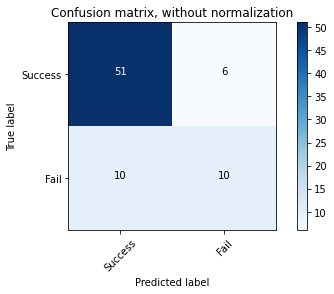

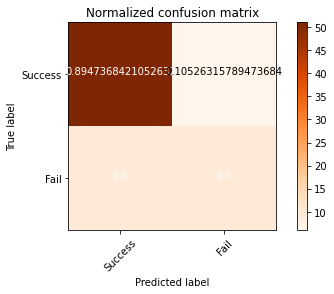

In [306]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_round_pred)
cm_plot_labels = ['Success','Fail']
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm, classes=cm_plot_labels, title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm, classes=cm_plot_labels, normalize=True, title='Normalized confusion matrix', cmap=plt.cm.Oranges)

plt.show()

## Model 100 employees

In [307]:
# Copy the dataframe to new one, for create the models
df_Model =  db_companies_Encode_Model.copy()

# Split our preprocessed data into our features and target arrays
y_name = "more100_employees"
y = df_Model["more100_employees"].values
X = df_Model.drop(["more50_employees","more100_employees","soonicorn"],1).values

# Split the preprocessed data into a training and testing dataset. Config split (70-15-15)
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78, test_size=0.30))
X_train, X_rem, y_train, y_rem = train_test_split(X,y, train_size=0.7)
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5)

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0]) # 65features
hidden_nodes_layer1 =  200 #Rule 3(lenfeatures)
hidden_nodes_layer2 = 130

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
#nn.summary()

# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=5)

#Early Stopping
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(
        monitor='accuracy', 
        patience=5,
        mode='max'
        ),
    tf.keras.callbacks.TensorBoard(log_dir='./logs')
]

In [308]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100, callbacks=my_callbacks, validation_data=((X_valid, y_valid)))

Epoch 1/100
12/12 [==============================] - 1s 18ms/step - loss: 0.5462 - accuracy: 0.7395 - val_loss: 1323256.3750 - val_accuracy: 0.9079
Epoch 2/100
12/12 [==============================] - 0s 5ms/step - loss: 0.3360 - accuracy: 0.8627 - val_loss: 482599.6875 - val_accuracy: 0.0789
Epoch 3/100
12/12 [==============================] - 0s 5ms/step - loss: 0.2489 - accuracy: 0.9076 - val_loss: 731922.6875 - val_accuracy: 0.0921
Epoch 4/100
12/12 [==============================] - 0s 6ms/step - loss: 0.2093 - accuracy: 0.9216 - val_loss: 823455.6250 - val_accuracy: 0.0921
Epoch 5/100
12/12 [==============================] - 0s 7ms/step - loss: 0.1834 - accuracy: 0.9328 - val_loss: 1029481.2500 - val_accuracy: 0.0921
Epoch 6/100
12/12 [==============================] - 0s 7ms/step - loss: 0.1619 - accuracy: 0.9384 - val_loss: 1190038.0000 - val_accuracy: 0.0921
Epoch 7/100
12/12 [==============================] - 0s 7ms/step - loss: 0.1429 - accuracy: 0.9468 - val_loss: 1285142.7

### Report model evaluation

In [309]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
# predict probabilities for test set
y_pred = nn.predict(X_test_scaled, verbose=0)
# round predict probabilities for test set
y_round_pred = (nn.predict(X_test_scaled) > 0.5).astype("int32")
# reduce to 1d array
y_pred = y_pred[:, 0]
y_round_pred = y_round_pred[:, 0]
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_round_pred)
# precision tp / (tp + fp)
precision = precision_score(y_test, y_round_pred)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_round_pred)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_round_pred)
# kappa
kappa = cohen_kappa_score(y_test, y_round_pred)
# ROC AUC
auc = roc_auc_score(y_test, y_pred)

3/3 - 0s - loss: 0.6115 - accuracy: 0.8831 - 21ms/epoch - 7ms/step


In [310]:
report(X=X, y=y, y_name=y_name, model=nn, X_train=X_train, y_train=y_train, X_valid=X_valid, y_valid=y_valid, X_test=X_test, y_test=y_test, model_loss=model_loss, accuracy=accuracy, precision=precision, recall=recall, f1=f1, kappa=kappa, auc=auc)


-----------
Unbalanced
X: 510
y: more100_employees
y: Counter({0: 437, 1: 73})
-----------
Train shape
X: (357, 87)
y : (357,)
Valid shape
X: (76, 87)
y : (76,)
Test shape
X: (77, 87)
y : (77,)

-----------

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_87 (Dense)            (None, 200)               17600     
                                                                 
 dense_88 (Dense)            (None, 130)               26130     
                                                                 
 dense_89 (Dense)            (None, 1)                 131       
                                                                 
Total params: 43,861
Trainable params: 43,861
Non-trainable params: 0
_________________________________________________________________

Loss: 0.6114981174468994
Accuracy: 0.883117
Precision: 0.666667
Recall: 0.500000
F1 score: 0.571429
Coh

Confusion matrix, without normalization
[[62  3]
 [ 6  6]]
Normalized confusion matrix
[[0.95 0.05]
 [0.5  0.5 ]]


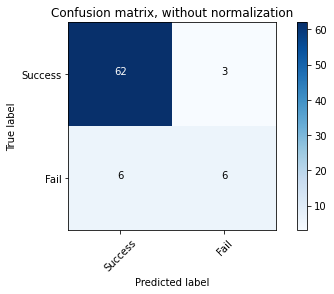

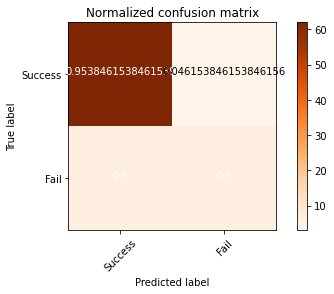

In [311]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_round_pred)
cm_plot_labels = ['Success','Fail']
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm, classes=cm_plot_labels, title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm, classes=cm_plot_labels, normalize=True, title='Normalized confusion matrix', cmap=plt.cm.Oranges)

plt.show()

## Model soonicorn

In [312]:
# Copy the dataframe to new one, for create the models
df_Model =  db_companies_Encode_Model.copy()

# Split our preprocessed data into our features and target arrays
y_name = "soonicorn"
y = df_Model["soonicorn"].values
X = df_Model.drop(["more50_employees","more100_employees","soonicorn"],1).values

# Split the preprocessed data into a training and testing dataset. Config split (70-15-15)
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78, test_size=0.30))
X_train, X_rem, y_train, y_rem = train_test_split(X,y, train_size=0.7)
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5)

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0]) # 65features
hidden_nodes_layer1 =  200 #Rule 3(lenfeatures)
hidden_nodes_layer2 = 130

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
#nn.summary()

# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=5)

#Early Stopping
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(
        monitor='accuracy', 
        patience=5,
        mode='max'
        ),
    tf.keras.callbacks.TensorBoard(log_dir='./logs')
]


In [313]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100, callbacks=my_callbacks, validation_data=((X_valid, y_valid)))

Epoch 1/100
12/12 [==============================] - 1s 19ms/step - loss: 0.3880 - accuracy: 0.8347 - val_loss: 3006058.0000 - val_accuracy: 0.9079
Epoch 2/100
12/12 [==============================] - 0s 7ms/step - loss: 0.1776 - accuracy: 0.9244 - val_loss: 2245438.0000 - val_accuracy: 0.0921
Epoch 3/100
12/12 [==============================] - 0s 7ms/step - loss: 0.1148 - accuracy: 0.9720 - val_loss: 2436687.7500 - val_accuracy: 0.0921
Epoch 4/100
12/12 [==============================] - 0s 5ms/step - loss: 0.0866 - accuracy: 0.9748 - val_loss: 2764722.2500 - val_accuracy: 0.0921
Epoch 5/100
12/12 [==============================] - 0s 7ms/step - loss: 0.0657 - accuracy: 0.9776 - val_loss: 2833367.7500 - val_accuracy: 0.0921
Epoch 6/100
12/12 [==============================] - 0s 6ms/step - loss: 0.0509 - accuracy: 0.9860 - val_loss: 3107489.7500 - val_accuracy: 0.0921
Epoch 7/100
12/12 [==============================] - 0s 6ms/step - loss: 0.0407 - accuracy: 0.9860 - val_loss: 328381

### Report model evaluation

In [314]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
# predict probabilities for test set
y_pred = nn.predict(X_test_scaled, verbose=0)
# round predict probabilities for test set
y_round_pred = (nn.predict(X_test_scaled) > 0.5).astype("int32")
# reduce to 1d array
y_pred = y_pred[:, 0]
y_round_pred = y_round_pred[:, 0]
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_round_pred)
# precision tp / (tp + fp)
precision = precision_score(y_test, y_round_pred)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_round_pred)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_round_pred)
# kappa
kappa = cohen_kappa_score(y_test, y_round_pred)
# ROC AUC
auc = roc_auc_score(y_test, y_pred)

3/3 - 0s - loss: 0.0585 - accuracy: 0.9870 - 19ms/epoch - 6ms/step


In [315]:
report(X=X, y=y, y_name=y_name, model=nn, X_train=X_train, y_train=y_train, X_valid=X_valid, y_valid=y_valid, X_test=X_test, y_test=y_test, model_loss=model_loss, accuracy=accuracy, precision=precision, recall=recall, f1=f1, kappa=kappa, auc=auc)


-----------
Unbalanced
X: 510
y: soonicorn
y: Counter({0: 468, 1: 42})
-----------
Train shape
X: (357, 87)
y : (357,)
Valid shape
X: (76, 87)
y : (76,)
Test shape
X: (77, 87)
y : (77,)

-----------

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_90 (Dense)            (None, 200)               17600     
                                                                 
 dense_91 (Dense)            (None, 130)               26130     
                                                                 
 dense_92 (Dense)            (None, 1)                 131       
                                                                 
Total params: 43,861
Trainable params: 43,861
Non-trainable params: 0
_________________________________________________________________

Loss: 0.058544084429740906
Accuracy: 0.987013
Precision: 1.000000
Recall: 0.800000
F1 score: 0.888889
Cohens ka

Confusion matrix, without normalization
[[72  0]
 [ 1  4]]
Normalized confusion matrix
[[1.  0. ]
 [0.2 0.8]]


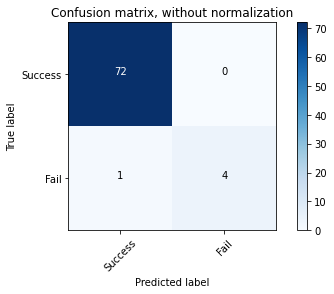

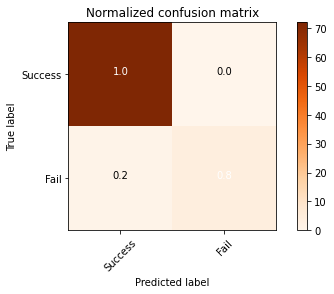

In [316]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_round_pred)
cm_plot_labels = ['Success','Fail']
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm, classes=cm_plot_labels, title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm, classes=cm_plot_labels, normalize=True, title='Normalized confusion matrix', cmap=plt.cm.Oranges)

plt.show()

# Balanced models

## OverSampling

### Model 50 employees

In [317]:
# Copy the dataframe to new one, for create the models
df_Model =  db_companies_Encode_Model.copy()

# Split our preprocessed data into our features and target arrays
y_name = "more50_employees"
y = df_Model["more50_employees"].values
X = df_Model.drop(["more50_employees","more100_employees","soonicorn"],1).values

# Split the preprocessed data into a training and testing dataset. Config split (70-15-15)
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78, test_size=0.30))
X_train, X_rem, y_train, y_rem = train_test_split(X,y, train_size=0.7)
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5)

In [318]:
# Balanced data
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=1)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

# Counter
print(f'Unbalance: {Counter(y_train)}')
print('-----------')
print(f'Balance: {Counter(y_resampled)}')


Unbalance: Counter({0: 271, 1: 86})
-----------
Balance: Counter({0: 271, 1: 271})


In [319]:
# undersampling. bajalos a 90

In [320]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_resampled)

# Scale the data
X_train_scaled = X_scaler.transform(X_resampled)
X_test_scaled = X_scaler.transform(X_test)

# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0]) # 65features
hidden_nodes_layer1 =  200 #Rule 3(lenfeatures)
hidden_nodes_layer2 = 130

# Create the model
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
#nn.summary()

# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=5)

#Early Stopping
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(
        monitor='accuracy', 
        patience=5,
        mode='max'
        ),
    tf.keras.callbacks.TensorBoard(log_dir='./logs')
]

accurancy parar... y hacer el crossvalidation.... cuando se hace los epoch.... cuando la validacion deiende ya esta obverfidato

In [321]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_resampled, epochs=100, callbacks=my_callbacks, validation_data=((X_valid, y_valid)))

Epoch 1/100
17/17 [==============================] - 1s 14ms/step - loss: 0.5449 - accuracy: 0.7269 - val_loss: 812614.0000 - val_accuracy: 0.2763
Epoch 2/100
17/17 [==============================] - 0s 4ms/step - loss: 0.3914 - accuracy: 0.8395 - val_loss: 1470587.6250 - val_accuracy: 0.2763
Epoch 3/100
17/17 [==============================] - 0s 6ms/step - loss: 0.3195 - accuracy: 0.8801 - val_loss: 1858652.0000 - val_accuracy: 0.2763
Epoch 4/100
17/17 [==============================] - 0s 4ms/step - loss: 0.2672 - accuracy: 0.9096 - val_loss: 2219154.0000 - val_accuracy: 0.2763
Epoch 5/100
17/17 [==============================] - 0s 4ms/step - loss: 0.2262 - accuracy: 0.9354 - val_loss: 2704168.7500 - val_accuracy: 0.2763
Epoch 6/100
17/17 [==============================] - 0s 5ms/step - loss: 0.1938 - accuracy: 0.9594 - val_loss: 2838103.0000 - val_accuracy: 0.2763
Epoch 7/100
17/17 [==============================] - 0s 4ms/step - loss: 0.1678 - accuracy: 0.9483 - val_loss: 3034428

#### Report model evaluation

In [322]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
# predict probabilities for test set
y_pred = nn.predict(X_test_scaled, verbose=0)
# round predict probabilities for test set
y_round_pred = (nn.predict(X_test_scaled) > 0.5).astype("int32")
# reduce to 1d array
y_pred = y_pred[:, 0]
y_round_pred = y_round_pred[:, 0]
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_round_pred)
# precision tp / (tp + fp)
precision = precision_score(y_test, y_round_pred)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_round_pred)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_round_pred)
# kappa
kappa = cohen_kappa_score(y_test, y_round_pred)
# ROC AUC
auc = roc_auc_score(y_test, y_pred)

3/3 - 0s - loss: 0.6711 - accuracy: 0.8701 - 21ms/epoch - 7ms/step


In [323]:
report(X=X, y=y, y_name=y_name, model=nn, X_train=X_train, y_train=y_train, X_valid=X_valid, y_valid=y_valid, X_test=X_test, y_test=y_test, model_loss=model_loss, accuracy=accuracy, precision=precision, recall=recall, f1=f1, kappa=kappa, auc=auc, balanced=True, y_resampled=y_resampled)


-----------
Balanced
X: 510
y: more50_employees
y: Counter({0: 391, 1: 119})
-----------
y_train
Unbalance: Counter({0: 271, 1: 86})
-----------
Balance: Counter({0: 271, 1: 271})
-----------
Train shape
X: (357, 87)
y : (357,)
Valid shape
X: (76, 87)
y : (76,)
Test shape
X: (77, 87)
y : (77,)

-----------

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_93 (Dense)            (None, 200)               17600     
                                                                 
 dense_94 (Dense)            (None, 130)               26130     
                                                                 
 dense_95 (Dense)            (None, 1)                 131       
                                                                 
Total params: 43,861
Trainable params: 43,861
Non-trainable params: 0
_________________________________________________________________

Lo

In [324]:
# no es tan bueo prediciendo los uno

Confusion matrix, without normalization
[[63  2]
 [ 8  4]]
Normalized confusion matrix
[[0.97 0.03]
 [0.67 0.33]]


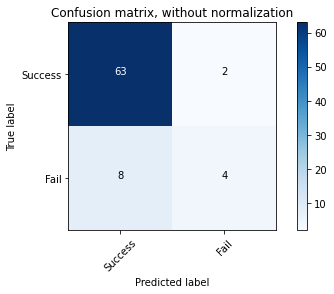

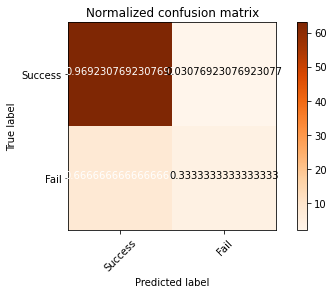

In [325]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_round_pred)
cm_plot_labels = ['Success','Fail']
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm, classes=cm_plot_labels, title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm, classes=cm_plot_labels, normalize=True, title='Normalized confusion matrix', cmap=plt.cm.Oranges)

plt.show()

### Model 100 employees

In [326]:
# Copy the dataframe to new one, for create the models
df_Model =  db_companies_Encode_Model.copy()

# Split our preprocessed data into our features and target arrays
y_name = "more50_employees"
y = df_Model["more50_employees"].values
X = df_Model.drop(["more50_employees","more100_employees","soonicorn"],1).values

# Split the preprocessed data into a training and testing dataset. Config split (70-15-15)
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78, test_size=0.30))
X_train, X_rem, y_train, y_rem = train_test_split(X,y, train_size=0.7)
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5)


In [327]:
# Balanced data
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=1)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

# Counter
print(f'Unbalance: {Counter(y_train)}')
print('-----------')
print(f'Balance: {Counter(y_resampled)}')

Unbalance: Counter({0: 275, 1: 82})
-----------
Balance: Counter({0: 275, 1: 275})


In [328]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_resampled)

# Scale the data
X_train_scaled = X_scaler.transform(X_resampled)
X_test_scaled = X_scaler.transform(X_test)

# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0]) # 65features
hidden_nodes_layer1 =  200 #Rule 3(lenfeatures)
hidden_nodes_layer2 = 130

# Create the model
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
#nn.summary()

# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=5)

#Early Stopping
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(
        monitor='accuracy', 
        patience=5,
        mode='max'
        ),
    tf.keras.callbacks.TensorBoard(log_dir='./logs')
]

In [329]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_resampled, epochs=100, callbacks=my_callbacks, validation_data=((X_valid, y_valid)))

Epoch 1/100
18/18 [==============================] - 1s 14ms/step - loss: 0.5525 - accuracy: 0.7291 - val_loss: 808987.1250 - val_accuracy: 0.2500
Epoch 2/100
18/18 [==============================] - 0s 6ms/step - loss: 0.3905 - accuracy: 0.8364 - val_loss: 1248072.5000 - val_accuracy: 0.2500
Epoch 3/100
18/18 [==============================] - 0s 5ms/step - loss: 0.3174 - accuracy: 0.8873 - val_loss: 1478535.7500 - val_accuracy: 0.2500
Epoch 4/100
18/18 [==============================] - 0s 7ms/step - loss: 0.2683 - accuracy: 0.9236 - val_loss: 1893675.3750 - val_accuracy: 0.2500
Epoch 5/100
18/18 [==============================] - 0s 5ms/step - loss: 0.2236 - accuracy: 0.9273 - val_loss: 2051960.8750 - val_accuracy: 0.2500
Epoch 6/100
18/18 [==============================] - 0s 5ms/step - loss: 0.1862 - accuracy: 0.9545 - val_loss: 2353428.2500 - val_accuracy: 0.2500
Epoch 7/100
18/18 [==============================] - 0s 5ms/step - loss: 0.1613 - accuracy: 0.9527 - val_loss: 2510511

#### Report model evaluation

In [330]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
# predict probabilities for test set
y_pred = nn.predict(X_test_scaled, verbose=0)
# round predict probabilities for test set
y_round_pred = (nn.predict(X_test_scaled) > 0.5).astype("int32")
# reduce to 1d array
y_pred = y_pred[:, 0]
y_round_pred = y_round_pred[:, 0]
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_round_pred)
# precision tp / (tp + fp)
precision = precision_score(y_test, y_round_pred)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_round_pred)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_round_pred)
# kappa
kappa = cohen_kappa_score(y_test, y_round_pred)
# ROC AUC
auc = roc_auc_score(y_test, y_pred)

3/3 - 0s - loss: 1.2834 - accuracy: 0.7403 - 22ms/epoch - 7ms/step


In [331]:
report(X=X, y=y, y_name=y_name, model=nn, X_train=X_train, y_train=y_train, X_valid=X_valid, y_valid=y_valid, X_test=X_test, y_test=y_test, model_loss=model_loss, accuracy=accuracy, precision=precision, recall=recall, f1=f1, kappa=kappa, auc=auc, balanced=True, y_resampled=y_resampled)


-----------
Balanced
X: 510
y: more50_employees
y: Counter({0: 391, 1: 119})
-----------
y_train
Unbalance: Counter({0: 275, 1: 82})
-----------
Balance: Counter({0: 275, 1: 275})
-----------
Train shape
X: (357, 87)
y : (357,)
Valid shape
X: (76, 87)
y : (76,)
Test shape
X: (77, 87)
y : (77,)

-----------

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_96 (Dense)            (None, 200)               17600     
                                                                 
 dense_97 (Dense)            (None, 130)               26130     
                                                                 
 dense_98 (Dense)            (None, 1)                 131       
                                                                 
Total params: 43,861
Trainable params: 43,861
Non-trainable params: 0
_________________________________________________________________

Lo

Confusion matrix, without normalization
[[50  9]
 [11  7]]
Normalized confusion matrix
[[0.85 0.15]
 [0.61 0.39]]


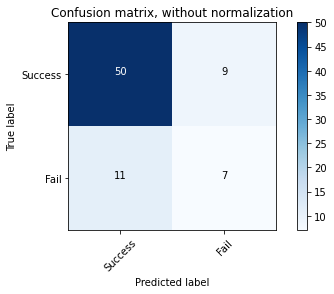

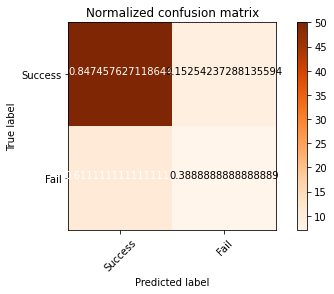

In [332]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_round_pred)
cm_plot_labels = ['Success','Fail']
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm, classes=cm_plot_labels, title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm, classes=cm_plot_labels, normalize=True, title='Normalized confusion matrix', cmap=plt.cm.Oranges)

plt.show()

### Model soonicorns

In [333]:
# Copy the dataframe to new one, for create the models
df_Model =  db_companies_Encode_Model.copy()

# Split our preprocessed data into our features and target arrays
y_name = "more50_employees"
y = df_Model["more50_employees"].values
X = df_Model.drop(["more50_employees","more100_employees","soonicorn"],1).values

# Split the preprocessed data into a training and testing dataset. Config split (70-15-15)
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78, test_size=0.30))
X_train, X_rem, y_train, y_rem = train_test_split(X,y, train_size=0.7)
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5)

In [334]:
# Balanced data
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=1)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

# Counter
print(f'Unbalance: {Counter(y_train)}')
print('-----------')
print(f'Balance: {Counter(y_resampled)}')

Unbalance: Counter({0: 269, 1: 88})
-----------
Balance: Counter({0: 269, 1: 269})


In [335]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_resampled)

# Scale the data
X_train_scaled = X_scaler.transform(X_resampled)
X_test_scaled = X_scaler.transform(X_test)

# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0]) # 65features
hidden_nodes_layer1 =  200 #Rule 3(lenfeatures)
hidden_nodes_layer2 = 130

# Create the model
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
#nn.summary()

# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=5)

#Early Stopping
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(
        monitor='accuracy', 
        patience=5,
        mode='max'
        ),
    tf.keras.callbacks.TensorBoard(log_dir='./logs')
]

In [336]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_resampled, epochs=100, callbacks=my_callbacks, validation_data=((X_valid, y_valid)))

Epoch 1/100
17/17 [==============================] - 1s 14ms/step - loss: 0.6214 - accuracy: 0.6617 - val_loss: 922810.8125 - val_accuracy: 0.1579
Epoch 2/100
17/17 [==============================] - 0s 4ms/step - loss: 0.4279 - accuracy: 0.7993 - val_loss: 1309490.0000 - val_accuracy: 0.1579
Epoch 3/100
17/17 [==============================] - 0s 4ms/step - loss: 0.3586 - accuracy: 0.8401 - val_loss: 1809995.0000 - val_accuracy: 0.1579
Epoch 4/100
17/17 [==============================] - 0s 5ms/step - loss: 0.3146 - accuracy: 0.8550 - val_loss: 2130091.2500 - val_accuracy: 0.1579
Epoch 5/100
17/17 [==============================] - 0s 4ms/step - loss: 0.2604 - accuracy: 0.9126 - val_loss: 2623179.2500 - val_accuracy: 0.1579
Epoch 6/100
17/17 [==============================] - 0s 4ms/step - loss: 0.2275 - accuracy: 0.9257 - val_loss: 3019328.7500 - val_accuracy: 0.1579
Epoch 7/100
17/17 [==============================] - 0s 5ms/step - loss: 0.2003 - accuracy: 0.9275 - val_loss: 3570552

#### Report model evaluation

In [337]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
# predict probabilities for test set
y_pred = nn.predict(X_test_scaled, verbose=0)
# round predict probabilities for test set
y_round_pred = (nn.predict(X_test_scaled) > 0.5).astype("int32")
# reduce to 1d array
y_pred = y_pred[:, 0]
y_round_pred = y_round_pred[:, 0]
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_round_pred)
# precision tp / (tp + fp)
precision = precision_score(y_test, y_round_pred)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_round_pred)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_round_pred)
# kappa
kappa = cohen_kappa_score(y_test, y_round_pred)
# ROC AUC
auc = roc_auc_score(y_test, y_pred)

3/3 - 0s - loss: 0.9960 - accuracy: 0.7922 - 24ms/epoch - 8ms/step


In [338]:
report(X=X, y=y, y_name=y_name, model=nn, X_train=X_train, y_train=y_train, X_valid=X_valid, y_valid=y_valid, X_test=X_test, y_test=y_test, model_loss=model_loss, accuracy=accuracy, precision=precision, recall=recall, f1=f1, kappa=kappa, auc=auc, balanced=True, y_resampled=y_resampled)


-----------
Balanced
X: 510
y: more50_employees
y: Counter({0: 391, 1: 119})
-----------
y_train
Unbalance: Counter({0: 269, 1: 88})
-----------
Balance: Counter({0: 269, 1: 269})
-----------
Train shape
X: (357, 87)
y : (357,)
Valid shape
X: (76, 87)
y : (76,)
Test shape
X: (77, 87)
y : (77,)

-----------

Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_99 (Dense)            (None, 200)               17600     
                                                                 
 dense_100 (Dense)           (None, 130)               26130     
                                                                 
 dense_101 (Dense)           (None, 1)                 131       
                                                                 
Total params: 43,861
Trainable params: 43,861
Non-trainable params: 0
_________________________________________________________________

Lo

Confusion matrix, without normalization
[[53  5]
 [11  8]]
Normalized confusion matrix
[[0.91 0.09]
 [0.58 0.42]]


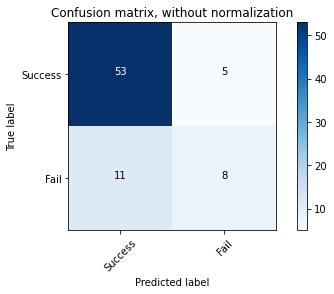

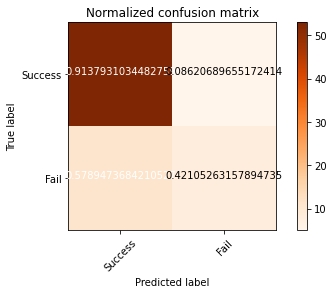

In [339]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_round_pred)
cm_plot_labels = ['Success','Fail']
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm, classes=cm_plot_labels, title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm, classes=cm_plot_labels, normalize=True, title='Normalized confusion matrix', cmap=plt.cm.Oranges)

plt.show()

## Undersampling

### Model 50 employees

In [340]:
# Copy the dataframe to new one, for create the models
df_Model =  db_companies_Encode_Model.copy()

# Split our preprocessed data into our features and target arrays
y_name = "more50_employees"
y = df_Model["more50_employees"].values
X = df_Model.drop(["more50_employees","more100_employees","soonicorn"],1).values

# Split the preprocessed data into a training and testing dataset. Config split (70-15-15)
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78, test_size=0.30))
X_train, X_rem, y_train, y_rem = train_test_split(X,y, train_size=0.7)
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5)

In [341]:
# Balanced data
from imblearn.under_sampling import RandomUnderSampler
ros = RandomUnderSampler(random_state=1)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

# Counter
print(f'Unbalance: {Counter(y_train)}')
print('-----------')
print(f'Balance: {Counter(y_resampled)}')


Unbalance: Counter({0: 269, 1: 88})
-----------
Balance: Counter({0: 88, 1: 88})


In [342]:
# undersampling. bajalos a 90

In [343]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_resampled)

# Scale the data
X_train_scaled = X_scaler.transform(X_resampled)
X_test_scaled = X_scaler.transform(X_test)

# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0]) # 65features
hidden_nodes_layer1 =  200 #Rule 3(lenfeatures)
hidden_nodes_layer2 = 130

# Create the model
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
#nn.summary()

# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=5)

#Early Stopping
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(
        monitor='accuracy', 
        patience=5,
        mode='max'
        ),
    tf.keras.callbacks.TensorBoard(log_dir='./logs')
]

In [344]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_resampled, epochs=100, callbacks=my_callbacks, validation_data=((X_valid, y_valid)))

Epoch 1/100
6/6 [==============================] - 1s 38ms/step - loss: 0.6901 - accuracy: 0.5625 - val_loss: 270483.3125 - val_accuracy: 0.2237
Epoch 2/100
6/6 [==============================] - 0s 11ms/step - loss: 0.5088 - accuracy: 0.7670 - val_loss: 454443.0000 - val_accuracy: 0.2237
Epoch 3/100
6/6 [==============================] - 0s 9ms/step - loss: 0.4294 - accuracy: 0.8068 - val_loss: 617797.5625 - val_accuracy: 0.2237
Epoch 4/100
6/6 [==============================] - 0s 12ms/step - loss: 0.3859 - accuracy: 0.8182 - val_loss: 746228.1250 - val_accuracy: 0.2237
Epoch 5/100
6/6 [==============================] - 0s 12ms/step - loss: 0.3471 - accuracy: 0.8523 - val_loss: 863516.3750 - val_accuracy: 0.2237
Epoch 6/100
6/6 [==============================] - 0s 11ms/step - loss: 0.3149 - accuracy: 0.8807 - val_loss: 1006195.5625 - val_accuracy: 0.2237
Epoch 7/100
6/6 [==============================] - 0s 13ms/step - loss: 0.2904 - accuracy: 0.8920 - val_loss: 1117865.8750 - val_a

#### Report model evaluation

In [345]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
# predict probabilities for test set
y_pred = nn.predict(X_test_scaled, verbose=0)
# round predict probabilities for test set
y_round_pred = (nn.predict(X_test_scaled) > 0.5).astype("int32")
# reduce to 1d array
y_pred = y_pred[:, 0]
y_round_pred = y_round_pred[:, 0]
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_round_pred)
# precision tp / (tp + fp)
precision = precision_score(y_test, y_round_pred)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_round_pred)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_round_pred)
# kappa
kappa = cohen_kappa_score(y_test, y_round_pred)
# ROC AUC
auc = roc_auc_score(y_test, y_pred)

3/3 - 0s - loss: 0.6937 - accuracy: 0.7403 - 20ms/epoch - 7ms/step


In [346]:
report(X=X, y=y, y_name=y_name, model=nn, X_train=X_train, y_train=y_train, X_valid=X_valid, y_valid=y_valid, X_test=X_test, y_test=y_test, model_loss=model_loss, accuracy=accuracy, precision=precision, recall=recall, f1=f1, kappa=kappa, auc=auc, balanced=True, y_resampled=y_resampled)


-----------
Balanced
X: 510
y: more50_employees
y: Counter({0: 391, 1: 119})
-----------
y_train
Unbalance: Counter({0: 269, 1: 88})
-----------
Balance: Counter({0: 88, 1: 88})
-----------
Train shape
X: (357, 87)
y : (357,)
Valid shape
X: (76, 87)
y : (76,)
Test shape
X: (77, 87)
y : (77,)

-----------

Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_102 (Dense)           (None, 200)               17600     
                                                                 
 dense_103 (Dense)           (None, 130)               26130     
                                                                 
 dense_104 (Dense)           (None, 1)                 131       
                                                                 
Total params: 43,861
Trainable params: 43,861
Non-trainable params: 0
_________________________________________________________________

Loss

Confusion matrix, without normalization
[[46 17]
 [ 3 11]]
Normalized confusion matrix
[[0.73 0.27]
 [0.21 0.79]]


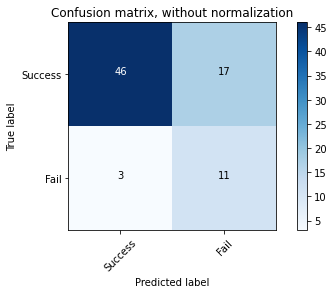

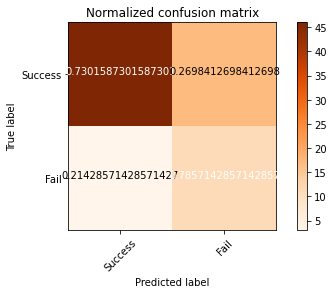

In [347]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_round_pred)
cm_plot_labels = ['Success','Fail']
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm, classes=cm_plot_labels, title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm, classes=cm_plot_labels, normalize=True, title='Normalized confusion matrix', cmap=plt.cm.Oranges)

plt.show()

### Model 100 employees

In [348]:
# Copy the dataframe to new one, for create the models
df_Model =  db_companies_Encode_Model.copy()

# Split our preprocessed data into our features and target arrays
y_name = "more50_employees"
y = df_Model["more50_employees"].values
X = df_Model.drop(["more50_employees","more100_employees","soonicorn"],1).values

# Split the preprocessed data into a training and testing dataset. Config split (70-15-15)
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78, test_size=0.30))
X_train, X_rem, y_train, y_rem = train_test_split(X,y, train_size=0.7)
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5)


In [349]:
# Balanced data
from imblearn.under_sampling import RandomUnderSampler
ros = RandomUnderSampler(random_state=1)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

# Counter
print(f'Unbalance: {Counter(y_train)}')
print('-----------')
print(f'Balance: {Counter(y_resampled)}')

Unbalance: Counter({0: 278, 1: 79})
-----------
Balance: Counter({0: 79, 1: 79})


In [350]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_resampled)

# Scale the data
X_train_scaled = X_scaler.transform(X_resampled)
X_test_scaled = X_scaler.transform(X_test)

# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0]) # 65features
hidden_nodes_layer1 =  200 #Rule 3(lenfeatures)
hidden_nodes_layer2 = 130

# Create the model
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
#nn.summary()

# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=5)

#Early Stopping
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(
        monitor='accuracy', 
        patience=5,
        mode='max'
        ),
    tf.keras.callbacks.TensorBoard(log_dir='./logs')
]

In [351]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_resampled, epochs=100, callbacks=my_callbacks, validation_data=((X_valid, y_valid)))

Epoch 1/100
5/5 [==============================] - 1s 44ms/step - loss: 0.6663 - accuracy: 0.6329 - val_loss: 186722.9219 - val_accuracy: 0.2763
Epoch 2/100
5/5 [==============================] - 0s 14ms/step - loss: 0.5095 - accuracy: 0.7785 - val_loss: 459915.3125 - val_accuracy: 0.2763
Epoch 3/100
5/5 [==============================] - 0s 12ms/step - loss: 0.4248 - accuracy: 0.8101 - val_loss: 689962.1250 - val_accuracy: 0.2763
Epoch 4/100
5/5 [==============================] - 0s 12ms/step - loss: 0.3753 - accuracy: 0.8165 - val_loss: 891382.1875 - val_accuracy: 0.2763
Epoch 5/100
5/5 [==============================] - 0s 14ms/step - loss: 0.3363 - accuracy: 0.8291 - val_loss: 1065815.6250 - val_accuracy: 0.2763
Epoch 6/100
5/5 [==============================] - 0s 12ms/step - loss: 0.3046 - accuracy: 0.8671 - val_loss: 1224291.6250 - val_accuracy: 0.2763
Epoch 7/100
5/5 [==============================] - 0s 15ms/step - loss: 0.2791 - accuracy: 0.8924 - val_loss: 1375920.1250 - val

#### Report model evaluation

In [352]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
# predict probabilities for test set
y_pred = nn.predict(X_test_scaled, verbose=0)
# round predict probabilities for test set
y_round_pred = (nn.predict(X_test_scaled) > 0.5).astype("int32")
# reduce to 1d array
y_pred = y_pred[:, 0]
y_round_pred = y_round_pred[:, 0]
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_round_pred)
# precision tp / (tp + fp)
precision = precision_score(y_test, y_round_pred)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_round_pred)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_round_pred)
# kappa
kappa = cohen_kappa_score(y_test, y_round_pred)
# ROC AUC
auc = roc_auc_score(y_test, y_pred)

3/3 - 0s - loss: 1.6529 - accuracy: 0.6494 - 20ms/epoch - 7ms/step


In [353]:
report(X=X, y=y, y_name=y_name, model=nn, X_train=X_train, y_train=y_train, X_valid=X_valid, y_valid=y_valid, X_test=X_test, y_test=y_test, model_loss=model_loss, accuracy=accuracy, precision=precision, recall=recall, f1=f1, kappa=kappa, auc=auc, balanced=True, y_resampled=y_resampled)


-----------
Balanced
X: 510
y: more50_employees
y: Counter({0: 391, 1: 119})
-----------
y_train
Unbalance: Counter({0: 278, 1: 79})
-----------
Balance: Counter({0: 79, 1: 79})
-----------
Train shape
X: (357, 87)
y : (357,)
Valid shape
X: (76, 87)
y : (76,)
Test shape
X: (77, 87)
y : (77,)

-----------

Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_105 (Dense)           (None, 200)               17600     
                                                                 
 dense_106 (Dense)           (None, 130)               26130     
                                                                 
 dense_107 (Dense)           (None, 1)                 131       
                                                                 
Total params: 43,861
Trainable params: 43,861
Non-trainable params: 0
_________________________________________________________________

Loss

Confusion matrix, without normalization
[[38 20]
 [ 7 12]]
Normalized confusion matrix
[[0.66 0.34]
 [0.37 0.63]]


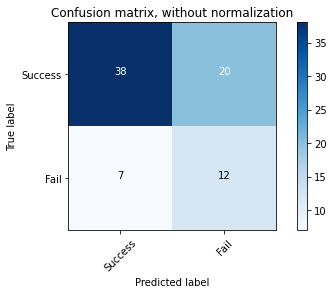

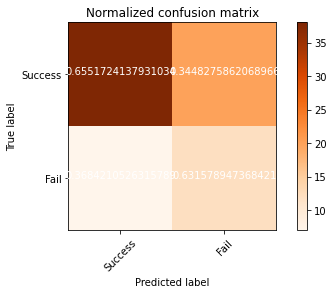

In [354]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_round_pred)
cm_plot_labels = ['Success','Fail']
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm, classes=cm_plot_labels, title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm, classes=cm_plot_labels, normalize=True, title='Normalized confusion matrix', cmap=plt.cm.Oranges)

plt.show()

### Model soonicorns

In [355]:
# Copy the dataframe to new one, for create the models
df_Model =  db_companies_Encode_Model.copy()

# Split our preprocessed data into our features and target arrays
y_name = "more50_employees"
y = df_Model["more50_employees"].values
X = df_Model.drop(["more50_employees","more100_employees","soonicorn"],1).values

# Split the preprocessed data into a training and testing dataset. Config split (70-15-15)
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78, test_size=0.30))
X_train, X_rem, y_train, y_rem = train_test_split(X,y, train_size=0.7)
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5)

In [356]:
# Balanced data
from imblearn.under_sampling import RandomUnderSampler
ros = RandomUnderSampler(random_state=1)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

# Counter
print(f'Unbalance: {Counter(y_train)}')
print('-----------')
print(f'Balance: {Counter(y_resampled)}')

Unbalance: Counter({0: 275, 1: 82})
-----------
Balance: Counter({0: 82, 1: 82})


In [357]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_resampled)

# Scale the data
X_train_scaled = X_scaler.transform(X_resampled)
X_test_scaled = X_scaler.transform(X_test)

# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0]) # 65features
hidden_nodes_layer1 =  200 #Rule 3(lenfeatures)
hidden_nodes_layer2 = 130

# Create the model
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
#nn.summary()

# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=5)

#Early Stopping
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(
        monitor='accuracy', 
        patience=5,
        mode='max'
        ),
    tf.keras.callbacks.TensorBoard(log_dir='./logs')
]

In [358]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_resampled, epochs=100, callbacks=my_callbacks, validation_data=((X_valid, y_valid)))

Epoch 1/100
6/6 [==============================] - 1s 38ms/step - loss: 0.7113 - accuracy: 0.5000 - val_loss: 314814.1250 - val_accuracy: 0.2500
Epoch 2/100
6/6 [==============================] - 0s 12ms/step - loss: 0.5221 - accuracy: 0.7805 - val_loss: 496355.6875 - val_accuracy: 0.2500
Epoch 3/100
6/6 [==============================] - 0s 9ms/step - loss: 0.4572 - accuracy: 0.7988 - val_loss: 636684.3750 - val_accuracy: 0.2500
Epoch 4/100
6/6 [==============================] - 0s 11ms/step - loss: 0.3972 - accuracy: 0.8293 - val_loss: 886639.8750 - val_accuracy: 0.2500
Epoch 5/100
6/6 [==============================] - 0s 13ms/step - loss: 0.3484 - accuracy: 0.8780 - val_loss: 1119021.8750 - val_accuracy: 0.2500
Epoch 6/100
6/6 [==============================] - 0s 9ms/step - loss: 0.3194 - accuracy: 0.8720 - val_loss: 1347544.3750 - val_accuracy: 0.2500
Epoch 7/100
6/6 [==============================] - 0s 10ms/step - loss: 0.3065 - accuracy: 0.8720 - val_loss: 1511459.7500 - val_a

#### Report model evaluation

In [359]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
# predict probabilities for test set
y_pred = nn.predict(X_test_scaled, verbose=0)
# round predict probabilities for test set
y_round_pred = (nn.predict(X_test_scaled) > 0.5).astype("int32")
# reduce to 1d array
y_pred = y_pred[:, 0]
y_round_pred = y_round_pred[:, 0]
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_round_pred)
# precision tp / (tp + fp)
precision = precision_score(y_test, y_round_pred)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_round_pred)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_round_pred)
# kappa
kappa = cohen_kappa_score(y_test, y_round_pred)
# ROC AUC
auc = roc_auc_score(y_test, y_pred)

3/3 - 0s - loss: 1.2060 - accuracy: 0.6883 - 23ms/epoch - 8ms/step


In [360]:
report(X=X, y=y, y_name=y_name, model=nn, X_train=X_train, y_train=y_train, X_valid=X_valid, y_valid=y_valid, X_test=X_test, y_test=y_test, model_loss=model_loss, accuracy=accuracy, precision=precision, recall=recall, f1=f1, kappa=kappa, auc=auc, balanced=True, y_resampled=y_resampled)


-----------
Balanced
X: 510
y: more50_employees
y: Counter({0: 391, 1: 119})
-----------
y_train
Unbalance: Counter({0: 275, 1: 82})
-----------
Balance: Counter({0: 82, 1: 82})
-----------
Train shape
X: (357, 87)
y : (357,)
Valid shape
X: (76, 87)
y : (76,)
Test shape
X: (77, 87)
y : (77,)

-----------

Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_108 (Dense)           (None, 200)               17600     
                                                                 
 dense_109 (Dense)           (None, 130)               26130     
                                                                 
 dense_110 (Dense)           (None, 1)                 131       
                                                                 
Total params: 43,861
Trainable params: 43,861
Non-trainable params: 0
_________________________________________________________________

Loss

Confusion matrix, without normalization
[[39 20]
 [ 4 14]]
Normalized confusion matrix
[[0.66 0.34]
 [0.22 0.78]]


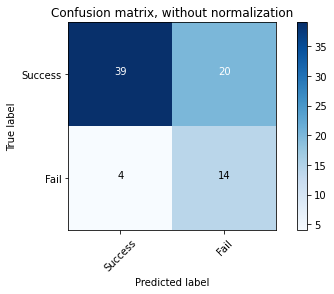

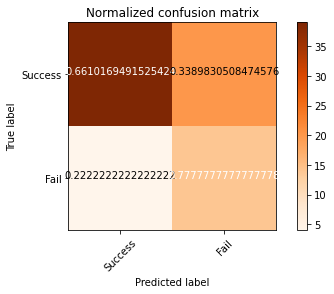

In [361]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_round_pred)
cm_plot_labels = ['Success','Fail']
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm, classes=cm_plot_labels, title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm, classes=cm_plot_labels, normalize=True, title='Normalized confusion matrix', cmap=plt.cm.Oranges)

plt.show()

## SMOTE

### Model 50 employees

In [362]:
# Copy the dataframe to new one, for create the models
df_Model =  db_companies_Encode_Model.copy()

# Split our preprocessed data into our features and target arrays
y_name = "more50_employees"
y = df_Model["more50_employees"].values
X = df_Model.drop(["more50_employees","more100_employees","soonicorn"],1).values

# Split the preprocessed data into a training and testing dataset. Config split (70-15-15)
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78, test_size=0.30))
X_train, X_rem, y_train, y_rem = train_test_split(X,y, train_size=0.7)
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5)

In [363]:
# Balanced data
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE(random_state=1,sampling_strategy='auto').fit_resample(X_train, y_train)

# Counter
print(f'Unbalance: {Counter(y_train)}')
print('-----------')
print(f'Balance: {Counter(y_resampled)}')


Unbalance: Counter({0: 271, 1: 86})
-----------
Balance: Counter({0: 271, 1: 271})


In [364]:
# undersampling. bajalos a 90

In [365]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_resampled)

# Scale the data
X_train_scaled = X_scaler.transform(X_resampled)
X_test_scaled = X_scaler.transform(X_test)

# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0]) # 65features
hidden_nodes_layer1 =  200 #Rule 3(lenfeatures)
hidden_nodes_layer2 = 130

# Create the model
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
#nn.summary()

# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=5)

#Early Stopping
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(
        monitor='accuracy', 
        patience=5,
        mode='max'
        ),
    tf.keras.callbacks.TensorBoard(log_dir='./logs')
]

accurancy parar... y hacer el crossvalidation.... cuando se hace los epoch.... cuando la validacion deiende ya esta obverfidato

In [366]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_resampled, epochs=100, callbacks=my_callbacks, validation_data=((X_valid, y_valid)))

Epoch 1/100
17/17 [==============================] - 1s 14ms/step - loss: 0.5947 - accuracy: 0.6771 - val_loss: 477546.5312 - val_accuracy: 0.1974
Epoch 2/100
17/17 [==============================] - 0s 5ms/step - loss: 0.4375 - accuracy: 0.8007 - val_loss: 754203.5000 - val_accuracy: 0.1974
Epoch 3/100
17/17 [==============================] - 0s 6ms/step - loss: 0.3671 - accuracy: 0.8358 - val_loss: 1149174.6250 - val_accuracy: 0.1974
Epoch 4/100
17/17 [==============================] - 0s 6ms/step - loss: 0.3121 - accuracy: 0.8838 - val_loss: 1408948.7500 - val_accuracy: 0.1974
Epoch 5/100
17/17 [==============================] - 0s 5ms/step - loss: 0.2655 - accuracy: 0.9207 - val_loss: 1616691.1250 - val_accuracy: 0.1974
Epoch 6/100
17/17 [==============================] - 0s 7ms/step - loss: 0.2300 - accuracy: 0.9465 - val_loss: 1902474.5000 - val_accuracy: 0.1974
Epoch 7/100
17/17 [==============================] - 0s 4ms/step - loss: 0.1897 - accuracy: 0.9465 - val_loss: 2252718.

#### Report model evaluation

In [367]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
# predict probabilities for test set
y_pred = nn.predict(X_test_scaled, verbose=0)
# round predict probabilities for test set
y_round_pred = (nn.predict(X_test_scaled) > 0.5).astype("int32")
# reduce to 1d array
y_pred = y_pred[:, 0]
y_round_pred = y_round_pred[:, 0]
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_round_pred)
# precision tp / (tp + fp)
precision = precision_score(y_test, y_round_pred)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_round_pred)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_round_pred)
# kappa
kappa = cohen_kappa_score(y_test, y_round_pred)
# ROC AUC
auc = roc_auc_score(y_test, y_pred)

3/3 - 0s - loss: 1.1545 - accuracy: 0.7922 - 22ms/epoch - 7ms/step


In [368]:
report(X=X, y=y, y_name=y_name, model=nn, X_train=X_train, y_train=y_train, X_valid=X_valid, y_valid=y_valid, X_test=X_test, y_test=y_test, model_loss=model_loss, accuracy=accuracy, precision=precision, recall=recall, f1=f1, kappa=kappa, auc=auc, balanced=True, y_resampled=y_resampled)


-----------
Balanced
X: 510
y: more50_employees
y: Counter({0: 391, 1: 119})
-----------
y_train
Unbalance: Counter({0: 271, 1: 86})
-----------
Balance: Counter({0: 271, 1: 271})
-----------
Train shape
X: (357, 87)
y : (357,)
Valid shape
X: (76, 87)
y : (76,)
Test shape
X: (77, 87)
y : (77,)

-----------

Model: "sequential_37"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_111 (Dense)           (None, 200)               17600     
                                                                 
 dense_112 (Dense)           (None, 130)               26130     
                                                                 
 dense_113 (Dense)           (None, 1)                 131       
                                                                 
Total params: 43,861
Trainable params: 43,861
Non-trainable params: 0
_________________________________________________________________

Lo

In [369]:
# no es tan bueo prediciendo los uno

Confusion matrix, without normalization
[[51  8]
 [ 8 10]]
Normalized confusion matrix
[[0.86 0.14]
 [0.44 0.56]]


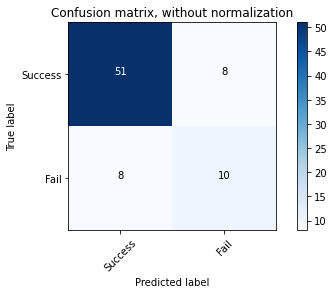

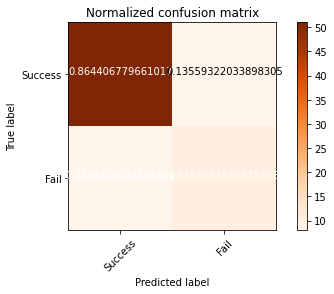

In [370]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_round_pred)
cm_plot_labels = ['Success','Fail']
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm, classes=cm_plot_labels, title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm, classes=cm_plot_labels, normalize=True, title='Normalized confusion matrix', cmap=plt.cm.Oranges)

plt.show()

### Model 100 employees

In [371]:
# Copy the dataframe to new one, for create the models
df_Model =  db_companies_Encode_Model.copy()

# Split our preprocessed data into our features and target arrays
y_name = "more50_employees"
y = df_Model["more50_employees"].values
X = df_Model.drop(["more50_employees","more100_employees","soonicorn"],1).values

# Split the preprocessed data into a training and testing dataset. Config split (70-15-15)
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78, test_size=0.30))
X_train, X_rem, y_train, y_rem = train_test_split(X,y, train_size=0.7)
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5)


In [372]:
# Balanced data
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE(random_state=1,sampling_strategy='auto').fit_resample(X_train, y_train)

# Counter
print(f'Unbalance: {Counter(y_train)}')
print('-----------')
print(f'Balance: {Counter(y_resampled)}')

Unbalance: Counter({0: 274, 1: 83})
-----------
Balance: Counter({1: 274, 0: 274})


In [373]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_resampled)

# Scale the data
X_train_scaled = X_scaler.transform(X_resampled)
X_test_scaled = X_scaler.transform(X_test)

# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0]) # 65features
hidden_nodes_layer1 =  200 #Rule 3(lenfeatures)
hidden_nodes_layer2 = 130

# Create the model
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
#nn.summary()

# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=5)

#Early Stopping
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(
        monitor='accuracy', 
        patience=5,
        mode='max'
        ),
    tf.keras.callbacks.TensorBoard(log_dir='./logs')
]

In [374]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_resampled, epochs=100, callbacks=my_callbacks, validation_data=((X_valid, y_valid)))

Epoch 1/100
18/18 [==============================] - 1s 14ms/step - loss: 0.6200 - accuracy: 0.6478 - val_loss: 478025.6875 - val_accuracy: 0.1842
Epoch 2/100
18/18 [==============================] - 0s 4ms/step - loss: 0.4495 - accuracy: 0.7719 - val_loss: 1009993.5000 - val_accuracy: 0.1842
Epoch 3/100
18/18 [==============================] - 0s 5ms/step - loss: 0.3904 - accuracy: 0.8212 - val_loss: 1143007.5000 - val_accuracy: 0.1842
Epoch 4/100
18/18 [==============================] - 0s 5ms/step - loss: 0.3386 - accuracy: 0.8522 - val_loss: 1487980.7500 - val_accuracy: 0.1842
Epoch 5/100
18/18 [==============================] - 0s 5ms/step - loss: 0.2936 - accuracy: 0.8777 - val_loss: 1802053.0000 - val_accuracy: 0.1842
Epoch 6/100
18/18 [==============================] - 0s 5ms/step - loss: 0.2485 - accuracy: 0.9015 - val_loss: 2191992.5000 - val_accuracy: 0.1842
Epoch 7/100
18/18 [==============================] - 0s 4ms/step - loss: 0.2151 - accuracy: 0.9270 - val_loss: 2578159

#### Report model evaluation

In [375]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
# predict probabilities for test set
y_pred = nn.predict(X_test_scaled, verbose=0)
# round predict probabilities for test set
y_round_pred = (nn.predict(X_test_scaled) > 0.5).astype("int32")
# reduce to 1d array
y_pred = y_pred[:, 0]
y_round_pred = y_round_pred[:, 0]
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_round_pred)
# precision tp / (tp + fp)
precision = precision_score(y_test, y_round_pred)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_round_pred)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_round_pred)
# kappa
kappa = cohen_kappa_score(y_test, y_round_pred)
# ROC AUC
auc = roc_auc_score(y_test, y_pred)

3/3 - 0s - loss: 1.4022 - accuracy: 0.7143 - 20ms/epoch - 7ms/step


In [376]:
report(X=X, y=y, y_name=y_name, model=nn, X_train=X_train, y_train=y_train, X_valid=X_valid, y_valid=y_valid, X_test=X_test, y_test=y_test, model_loss=model_loss, accuracy=accuracy, precision=precision, recall=recall, f1=f1, kappa=kappa, auc=auc, balanced=True, y_resampled=y_resampled)


-----------
Balanced
X: 510
y: more50_employees
y: Counter({0: 391, 1: 119})
-----------
y_train
Unbalance: Counter({0: 274, 1: 83})
-----------
Balance: Counter({1: 274, 0: 274})
-----------
Train shape
X: (357, 87)
y : (357,)
Valid shape
X: (76, 87)
y : (76,)
Test shape
X: (77, 87)
y : (77,)

-----------

Model: "sequential_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_114 (Dense)           (None, 200)               17600     
                                                                 
 dense_115 (Dense)           (None, 130)               26130     
                                                                 
 dense_116 (Dense)           (None, 1)                 131       
                                                                 
Total params: 43,861
Trainable params: 43,861
Non-trainable params: 0
_________________________________________________________________

Lo

Confusion matrix, without normalization
[[40 15]
 [ 7 15]]
Normalized confusion matrix
[[0.73 0.27]
 [0.32 0.68]]


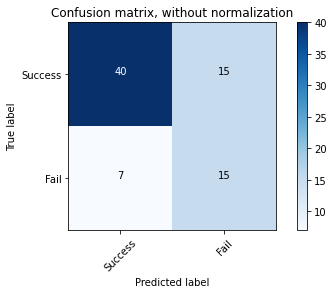

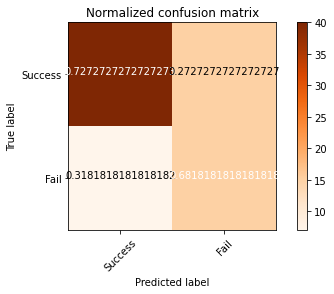

In [377]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_round_pred)
cm_plot_labels = ['Success','Fail']
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm, classes=cm_plot_labels, title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm, classes=cm_plot_labels, normalize=True, title='Normalized confusion matrix', cmap=plt.cm.Oranges)

plt.show()

### Model soonicorns

In [378]:
# Copy the dataframe to new one, for create the models
df_Model =  db_companies_Encode_Model.copy()

# Split our preprocessed data into our features and target arrays
y_name = "more50_employees"
y = df_Model["more50_employees"].values
X = df_Model.drop(["more50_employees","more100_employees","soonicorn"],1).values

# Split the preprocessed data into a training and testing dataset. Config split (70-15-15)
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78, test_size=0.30))
X_train, X_rem, y_train, y_rem = train_test_split(X,y, train_size=0.7)
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5)

In [379]:
# Balanced data
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE(random_state=1,sampling_strategy='auto').fit_resample(X_train, y_train)

# Counter
print(f'Unbalance: {Counter(y_train)}')
print('-----------')
print(f'Balance: {Counter(y_resampled)}')

Unbalance: Counter({0: 282, 1: 75})
-----------
Balance: Counter({0: 282, 1: 282})


In [380]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_resampled)

# Scale the data
X_train_scaled = X_scaler.transform(X_resampled)
X_test_scaled = X_scaler.transform(X_test)

# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0]) # 65features
hidden_nodes_layer1 =  200 #Rule 3(lenfeatures)
hidden_nodes_layer2 = 130

# Create the model
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
#nn.summary()

# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=5)

#Early Stopping
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(
        monitor='accuracy', 
        patience=5,
        mode='max'
        ),
    tf.keras.callbacks.TensorBoard(log_dir='./logs')
]

In [381]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_resampled, epochs=100, callbacks=my_callbacks, validation_data=((X_valid, y_valid)))

Epoch 1/100
18/18 [==============================] - 1s 12ms/step - loss: 0.5901 - accuracy: 0.6791 - val_loss: 445248.3125 - val_accuracy: 0.2895
Epoch 2/100
18/18 [==============================] - 0s 5ms/step - loss: 0.4150 - accuracy: 0.8103 - val_loss: 665536.1875 - val_accuracy: 0.2895
Epoch 3/100
18/18 [==============================] - 0s 6ms/step - loss: 0.3319 - accuracy: 0.8741 - val_loss: 860555.5625 - val_accuracy: 0.2895
Epoch 4/100
18/18 [==============================] - 0s 4ms/step - loss: 0.2894 - accuracy: 0.8901 - val_loss: 1087463.1250 - val_accuracy: 0.2895
Epoch 5/100
18/18 [==============================] - 0s 5ms/step - loss: 0.2389 - accuracy: 0.9291 - val_loss: 1196208.1250 - val_accuracy: 0.2895
Epoch 6/100
18/18 [==============================] - 0s 5ms/step - loss: 0.2063 - accuracy: 0.9326 - val_loss: 1429255.8750 - val_accuracy: 0.2895
Epoch 7/100
18/18 [==============================] - 0s 5ms/step - loss: 0.1769 - accuracy: 0.9486 - val_loss: 1495535.6

#### Report model evaluation

In [382]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
# predict probabilities for test set
y_pred = nn.predict(X_test_scaled, verbose=0)
# round predict probabilities for test set
y_round_pred = (nn.predict(X_test_scaled) > 0.5).astype("int32")
# reduce to 1d array
y_pred = y_pred[:, 0]
y_round_pred = y_round_pred[:, 0]
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_round_pred)
# precision tp / (tp + fp)
precision = precision_score(y_test, y_round_pred)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_round_pred)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_round_pred)
# kappa
kappa = cohen_kappa_score(y_test, y_round_pred)
# ROC AUC
auc = roc_auc_score(y_test, y_pred)

3/3 - 0s - loss: 1.0794 - accuracy: 0.7922 - 24ms/epoch - 8ms/step


In [383]:
report(X=X, y=y, y_name=y_name, model=nn, X_train=X_train, y_train=y_train, X_valid=X_valid, y_valid=y_valid, X_test=X_test, y_test=y_test, model_loss=model_loss, accuracy=accuracy, precision=precision, recall=recall, f1=f1, kappa=kappa, auc=auc, balanced=True, y_resampled=y_resampled)


-----------
Balanced
X: 510
y: more50_employees
y: Counter({0: 391, 1: 119})
-----------
y_train
Unbalance: Counter({0: 282, 1: 75})
-----------
Balance: Counter({0: 282, 1: 282})
-----------
Train shape
X: (357, 87)
y : (357,)
Valid shape
X: (76, 87)
y : (76,)
Test shape
X: (77, 87)
y : (77,)

-----------

Model: "sequential_39"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_117 (Dense)           (None, 200)               17600     
                                                                 
 dense_118 (Dense)           (None, 130)               26130     
                                                                 
 dense_119 (Dense)           (None, 1)                 131       
                                                                 
Total params: 43,861
Trainable params: 43,861
Non-trainable params: 0
_________________________________________________________________

Lo

Confusion matrix, without normalization
[[51  4]
 [12 10]]
Normalized confusion matrix
[[0.93 0.07]
 [0.55 0.45]]


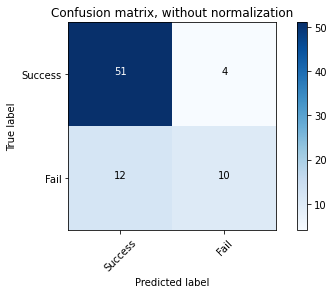

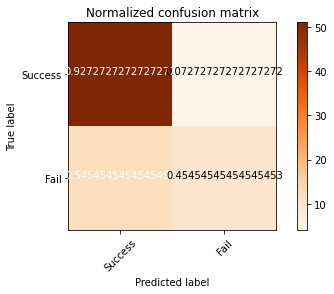

In [384]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_round_pred)
cm_plot_labels = ['Success','Fail']
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm, classes=cm_plot_labels, title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm, classes=cm_plot_labels, normalize=True, title='Normalized confusion matrix', cmap=plt.cm.Oranges)

plt.show()

# Signout code

In [ ]:
private void signOut() {
    mGoogleSignInClient.signOut()
            .addOnCompleteListener(this, new OnCompleteListener<Void>() {
                @Override
                public void onComplete(@NonNull Task<Void> task) {
                    // ...
                }
            });

signOut()

File


In [ ]:
from google.colab import files

with open('/content/drive/MyDrive/Final_project/Second_Deliverable/key_config.txt', "r") as file:
    FileasList = file.readlines()
    username = FileasList[0]
    password = FileasList[1]

    new_line = []
    # Loop through the file
    for i in FileasList:
        # Get rid of any new lines ("enter")
        i = i.replace("\n", "")
        # Add the cleaned data to the new_line list
        new_line.append(i)
    # Set the username to be the first object
    username = new_line[0]
    # Set the password to be the second object
    password = new_line[1]

In [ ]:
from sklearn.metrics import confusion_matrix

predictions = nn.predict(X_test_scaled)
y_pred = (predictions > 0.5)
cm = confusion_matrix(y_test,y_pred)
print(cm)